# Notebook Index
1. Data Loading and Intial Inspection
    - 1.1 Import Necessary libraries
    - 1.2 Load the dataset
    - 1.3 Data Overview
    - 1.4 Dropping Uneccessary columns
    - 1.5 Checking and correcting the data types of the columns
2. Exploratory Data Analysis and Data Cleaning
    - 2.1 check for duplicates
    - 2.2 Check for Missing values
    - 2.3 Visualization
        - 2.3.1 column split for analysis
     - 2.4 Intial EDA
        - 2.4.1 visualization for numerical columns
        - 2.4.2 visualization for categorical columns
        - 2.4.3 multicollinearity check
3. Data Preprocessing
    - 3.1 Outliers Treatment
    - 3.2 Feature Engineering
    - 3.3 Dropping Redundant columns
    - 3.4 Encoding
4. Train-Test Split
5. Target Encoding
6. Scaling
7. Applying SMOTE Technique
8. Model Training  
   - 7.1 Using Random Forest
   - 7.2 Using XG Boost
   - 7.3 Hyper Parameter Tuning
9. Feature Importance
    - Top 10 features
    - Visualization for Feature Importance
10. Save the Model
11. Final Recommendation

# __________________________________________________________________________________________________________________

# 📌 Problem Statement

Develop a predictive model that assesses the claim probability for car insurance policies.
The objective would be 
- To understand the factors that influence claim frequency and severity in the period of six months and
- Enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

# ___________________________________________________________________________________________________________________

# 1. Data Loading and Intial Inspection

### 1.1 Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
import warnings;
warnings.filterwarnings('ignore');

### 1.2 Load the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Santhoshi\Downloads\insurance_claim_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### 1.3 Data Overview

In [4]:
print('Dataset Shape:', df.shape)
print('-'*50)
print("\nData Types:")
print(df.info())
print('-'*50)
print("\nSample of the data:")
df.head(20)

Dataset Shape: (58592, 44)
--------------------------------------------------

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


# _________________________________________________________________________________________________________________

### Observation
- 'policy_tenure' and age_of_car are already stored as small decimal values (e.g., 0.5 = 6 months). These are normalized fractions of a year, so they’re ready for modeling.
- 'age_of_policyholder' is also given as a small decimal. The actual age has been transformed.
- 'population_density' is a very large number (in thousands). If we use it as it is, it will dominate the smaller values.
Fix: Scale or normalize this column so it’s on the same range (0–1) as the others before training the model.

# __________________________________________________________________________________________________________________

### 1.4 Dropping Uneccessary columns

In [5]:
# 'policy_id' column has no predictive power, this is a unique identifier for each policy, It has no casual relationship with the probability of a claim

df.drop(columns = ['policy_id'], axis = 1, inplace = True)

#

### 1.5 Checking and correcting the datatypes of columns

In [6]:
print(df.dtypes)

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

#

# 2. Exploratory Data Analysis and Data Cleaning

### 2.1 check for duplicate values

In [7]:
print(df.duplicated().sum())

0


### 2.2 check for missing values

In [8]:
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

### 2.3 Visualization

#### 2.3.1 column split for analysis

In [9]:
cat_col = df.select_dtypes(include = ['object', 'category']).copy()
num_col = df.select_dtypes(include = ['int64', 'float64']).copy()

### check for unique values of columns

In [10]:
# for num_cols
cols = ['age_of_car', 'make', 'airbags', 'displacement', 'cylinder','gear_box', 'turning_radius', 'length', 'width', 'height','gross_weight', 'ncap_rating', 'is_claim']
col = df[cols].copy()

for i in col:
    print(i, col[i].unique())
    print('-'*50)

age_of_car [0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]
--------------------------------------------------
make [1 2 3 4 5]
--------------------------------------------------
airbags [2 6 1]
--------------------------------------------------
displacement [ 796 1197  999 1493 1497  998 1498 1196 1199]
--------------------------------------------------
cylinder [3 4]
--------------------------------------------------
gear_box [5 6]
--------------------------------------------------
turning_radius [4.6  4.8  5.   5.2  4.85 4.7  4.9  4.5  5.1 ]
--------------------------------------------------
length [3445 3995 3731 4300 3990 3845 3655 3675 3993]
--------------------------------------------------
width [1515 1735 1579 1790 1755 1745 1620 1695 1475 1811]
----------------------------------

In [11]:
# for categorical columns
for i in cat_col:
    print(i, cat_col[i].unique())
    print('-'*50)

area_cluster ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
--------------------------------------------------
segment ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
--------------------------------------------------
model ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
--------------------------------------------------
fuel_type ['CNG' 'Petrol' 'Diesel']
--------------------------------------------------
max_torque ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
--------------------------------------------------
max_power ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
--------------------------------------------------
engine_type ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1

## 2.4 Intial EDA

### 2.4.1 visualization for numerical columns

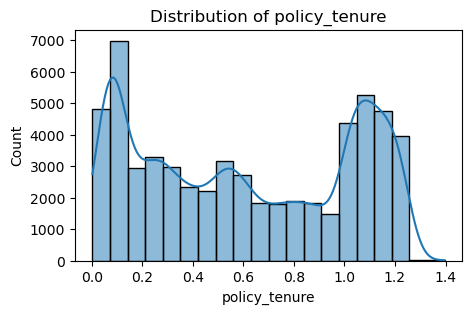

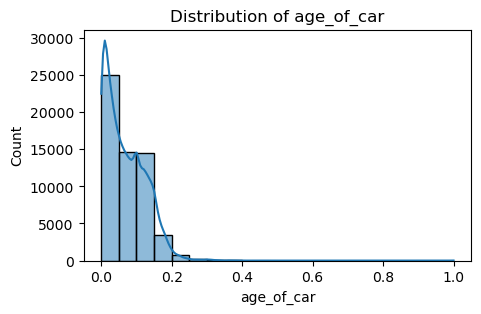

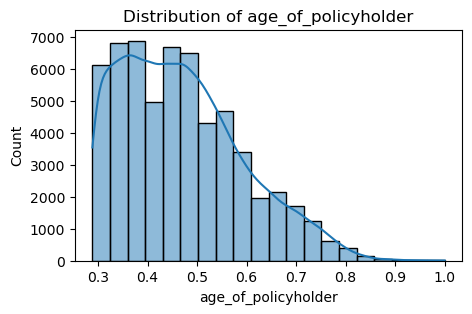

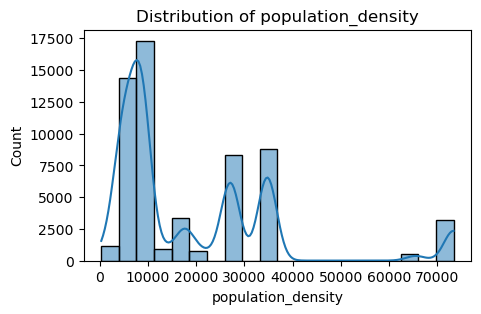

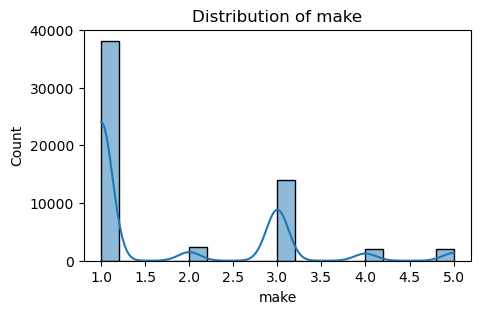

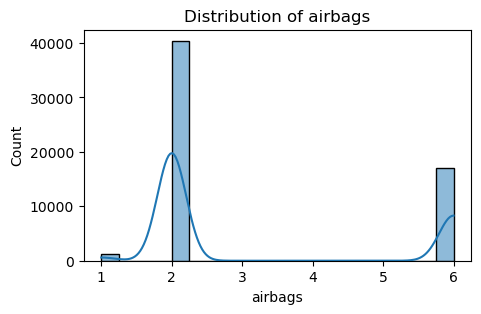

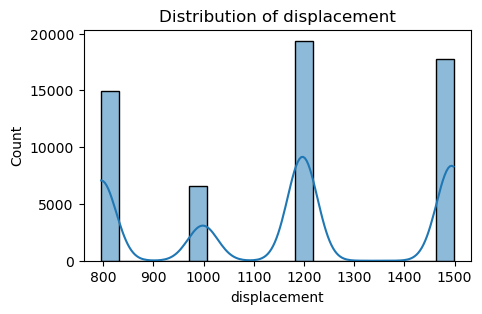

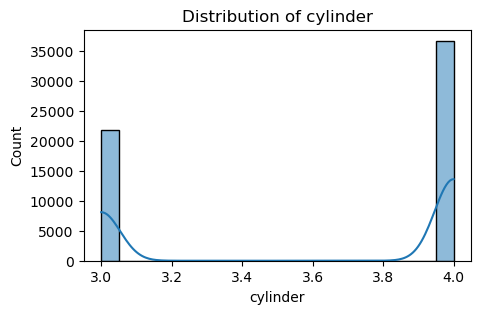

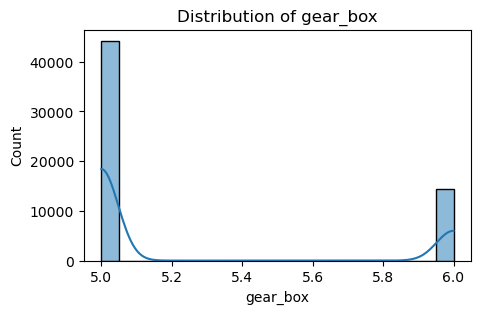

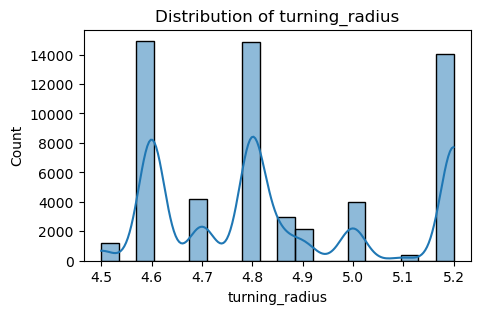

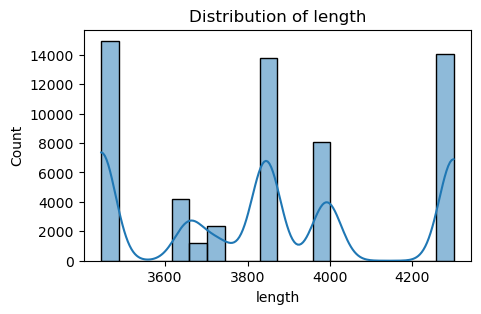

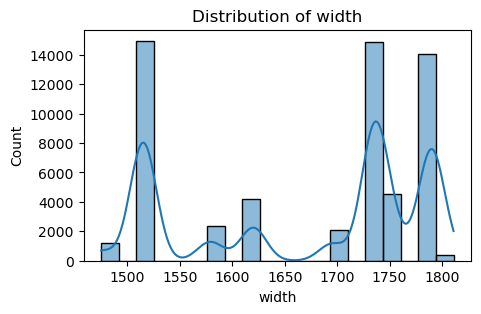

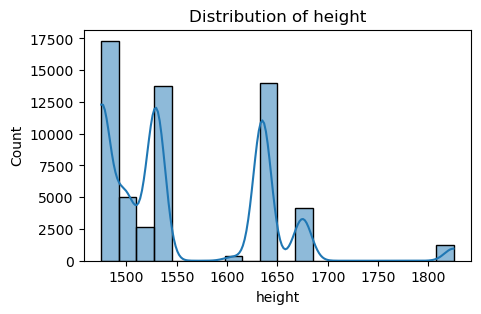

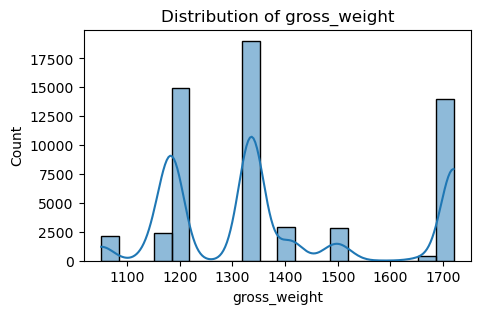

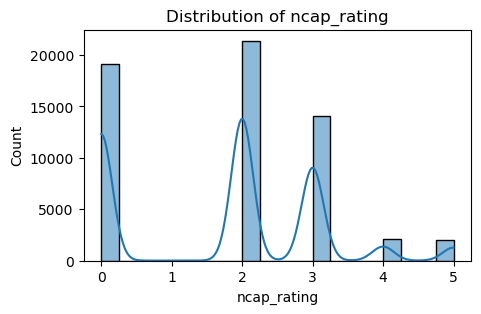

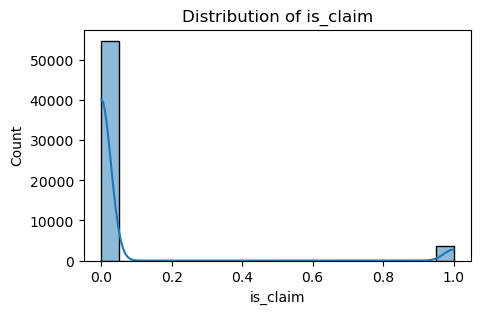

In [12]:
def plot_histogram(num_col, col):
    plt.figure(figsize = (5,3))
    sns.histplot(num_col[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

for col in num_col.columns:
    plot_histogram(num_col, col)

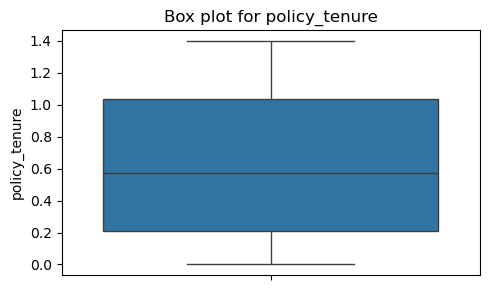

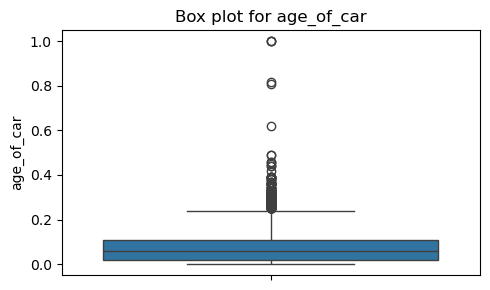

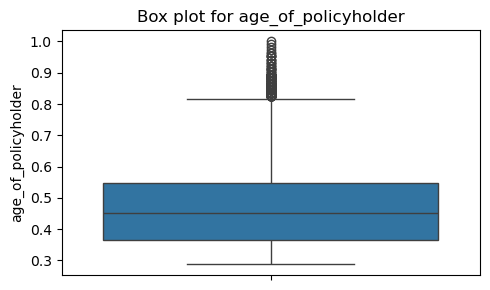

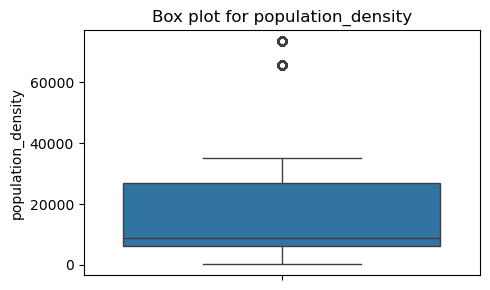

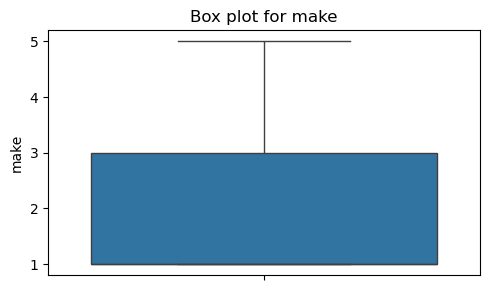

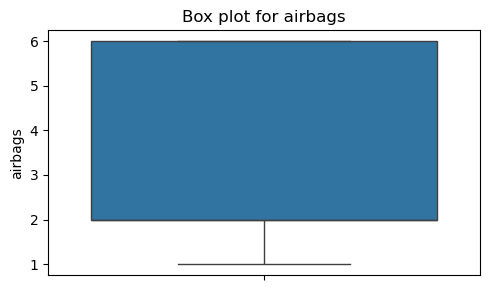

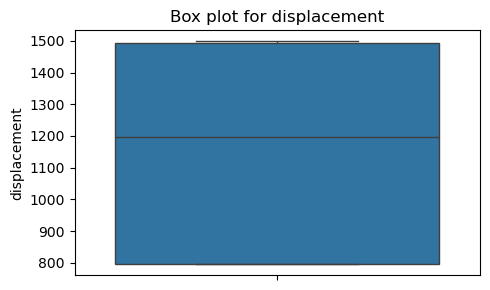

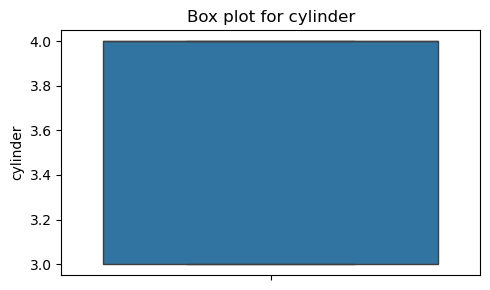

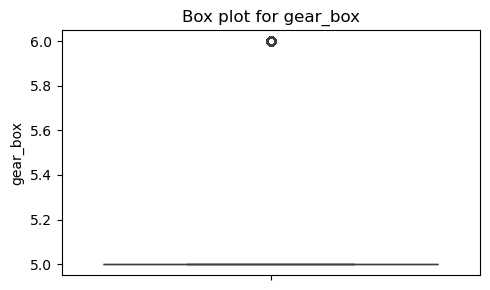

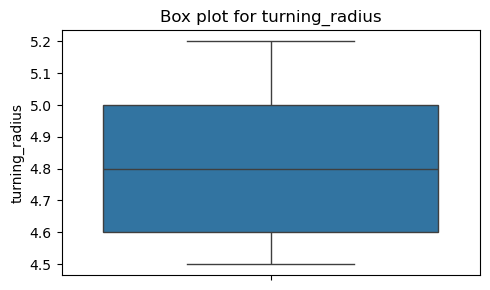

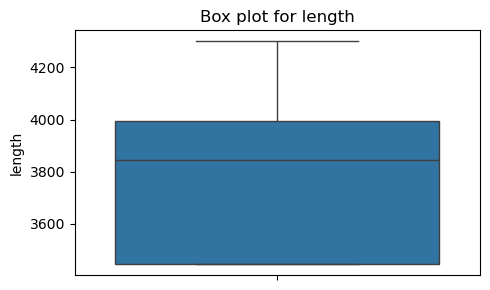

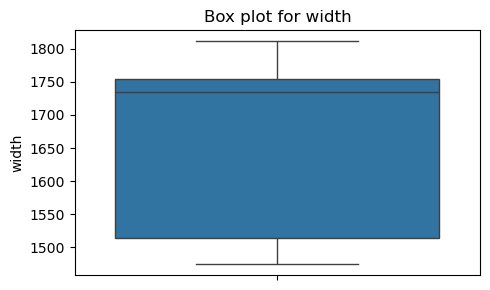

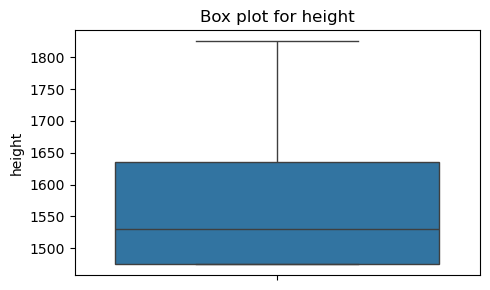

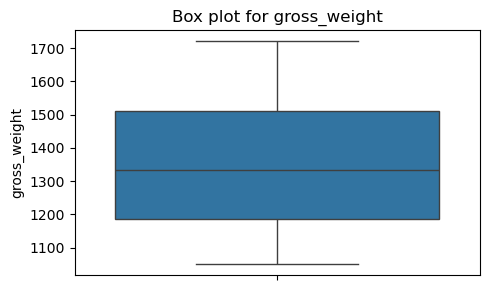

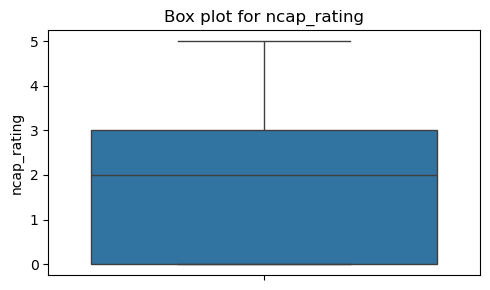

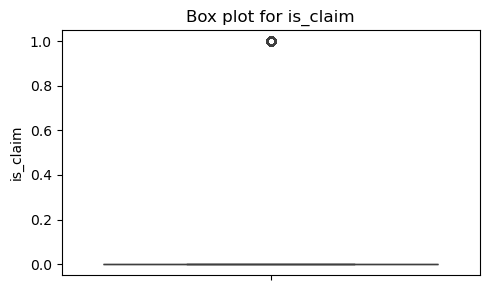

In [13]:
def plot_boxplot(num_col, col):
    plt.figure(figsize = (5,3))
    sns.boxplot(data = num_col[col])
    plt.title(f'Box plot for {col}')
    plt.tight_layout()
    plt.show()

for col in num_col.columns:
    plot_boxplot(num_col, col)

In [14]:
df['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

# _____________________________________________________________________________________________________________

## Observation
- Outliers detected in 'age_of_car', 'age_of_policyholder', 'population_density', 'gear_box' -> outlier treatment like log transform, IQR and binning
- target variable 'is_claim' is imbalanced -> apply Sampling technique SMOTE

# ______________________________________________________________________________________________________________

### 2.4.2 Visualization for categorical columns

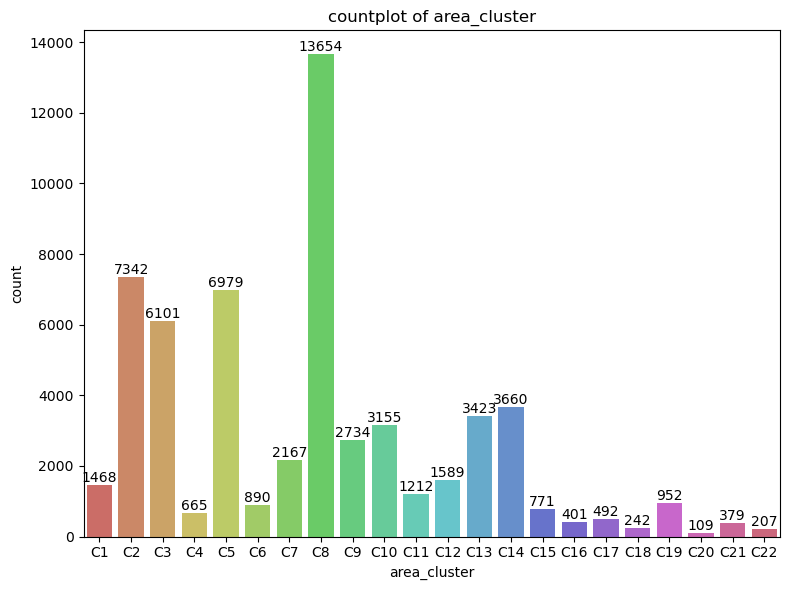

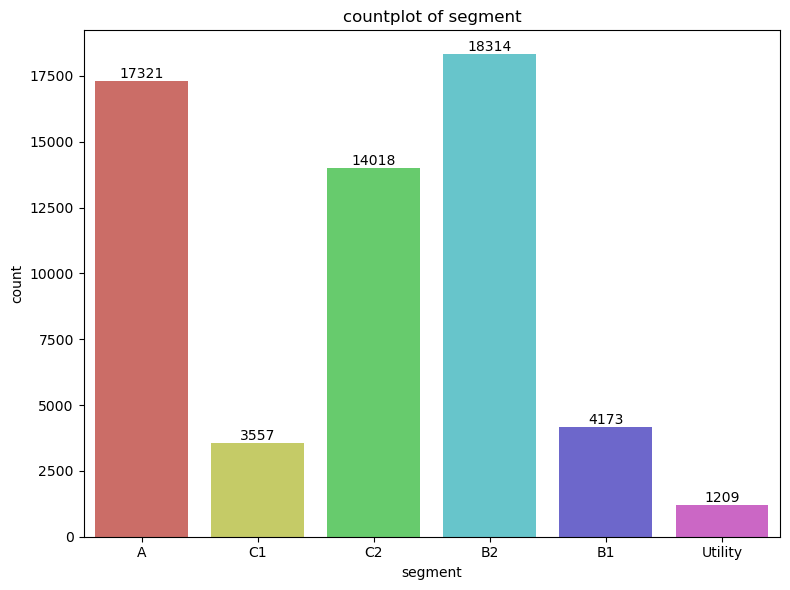

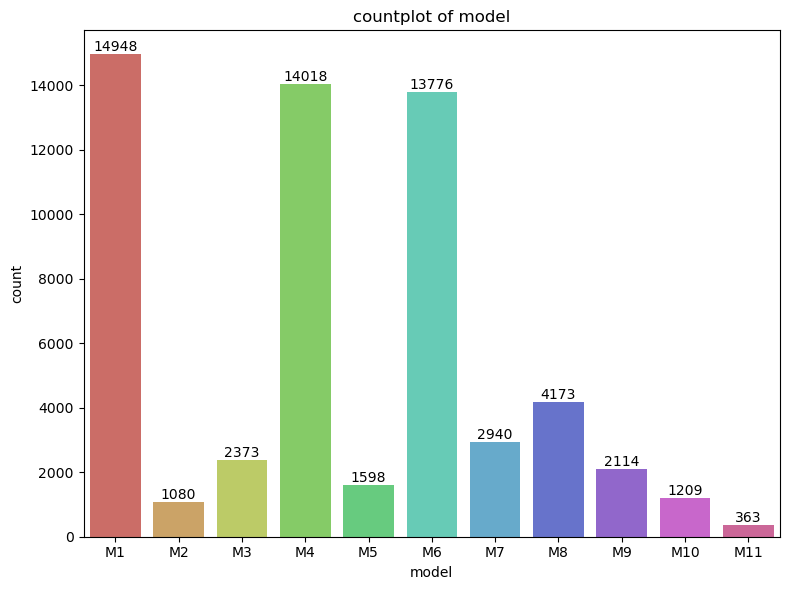

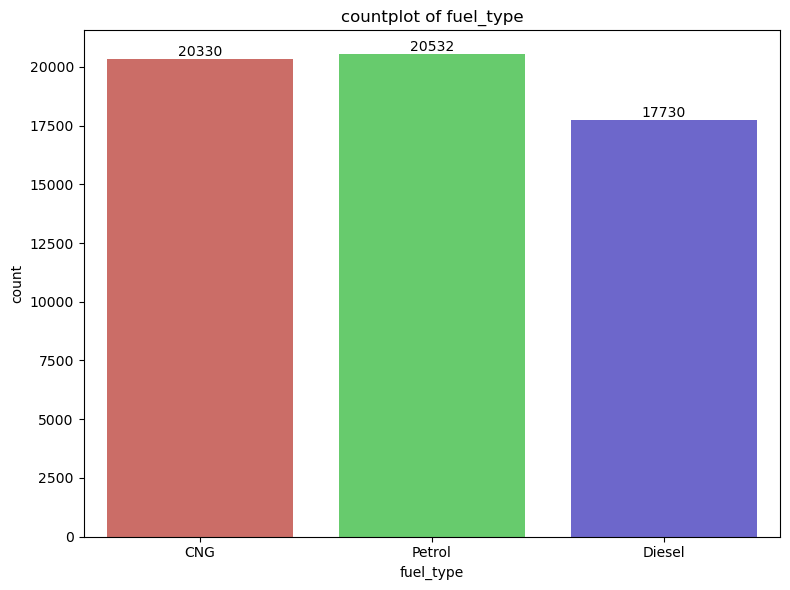

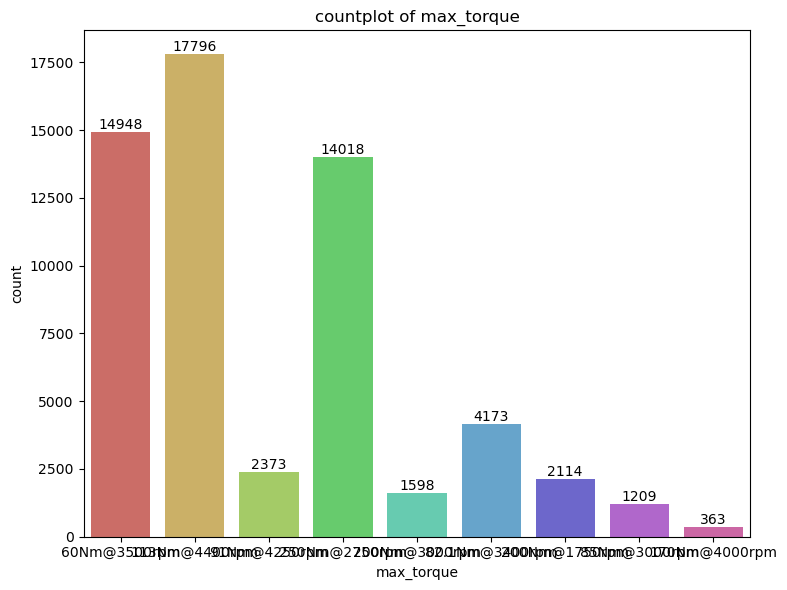

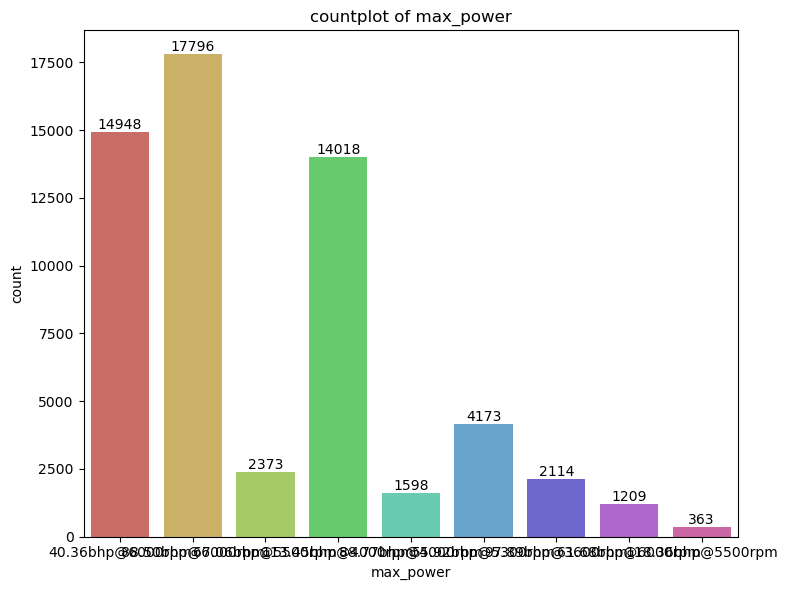

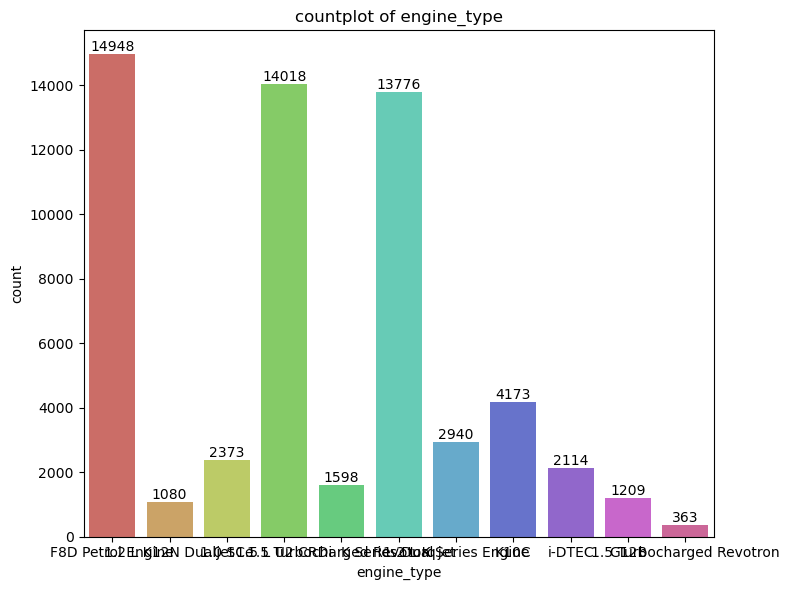

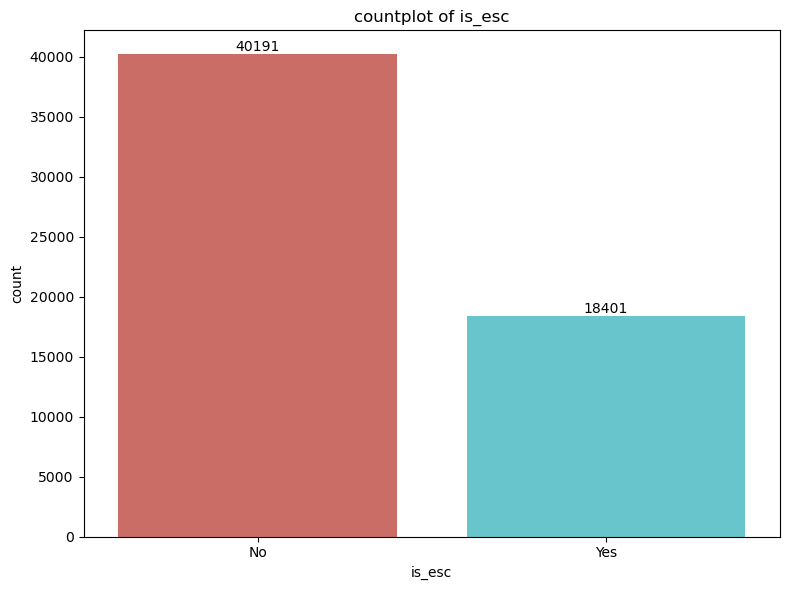

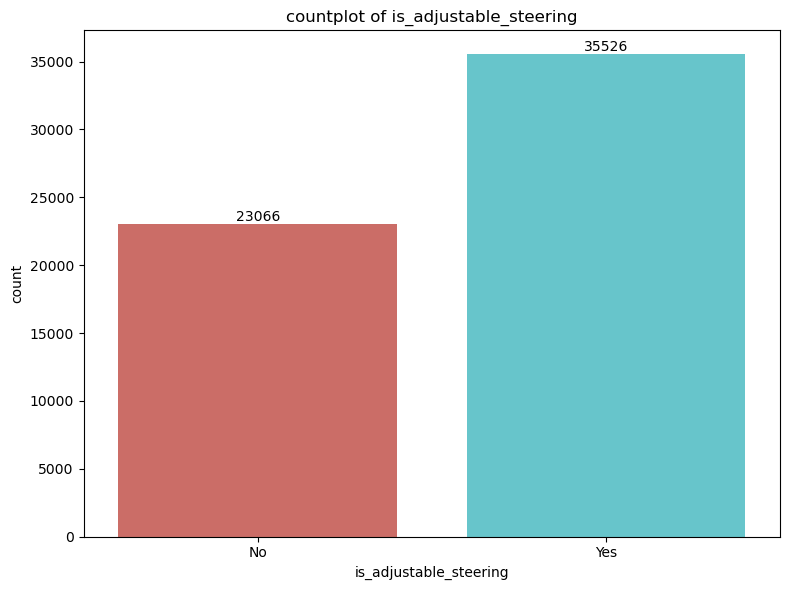

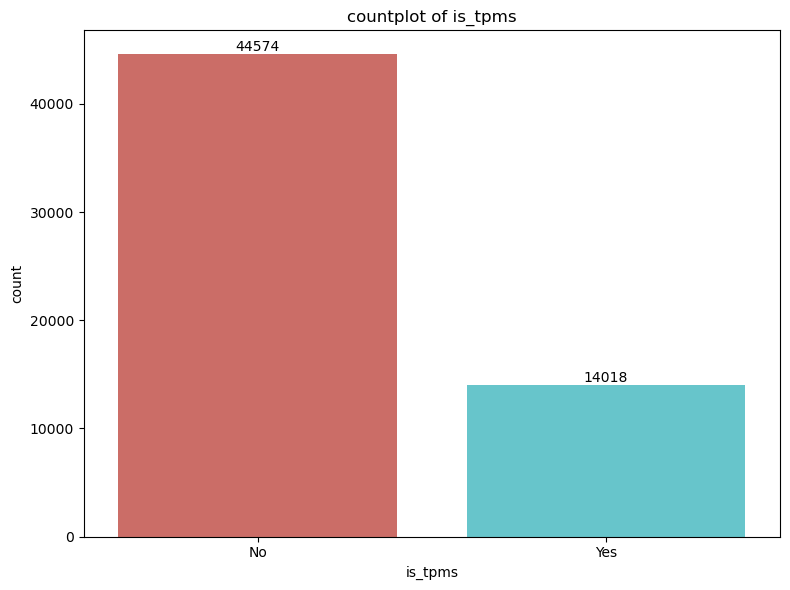

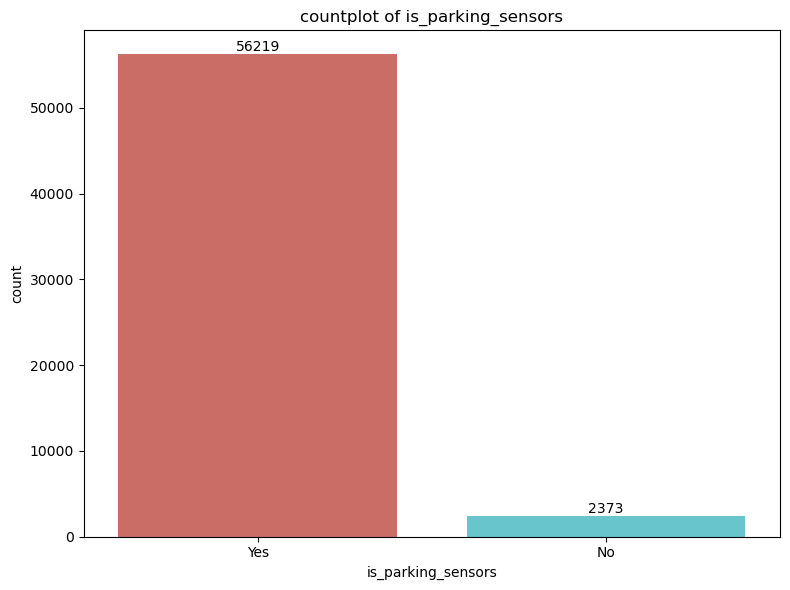

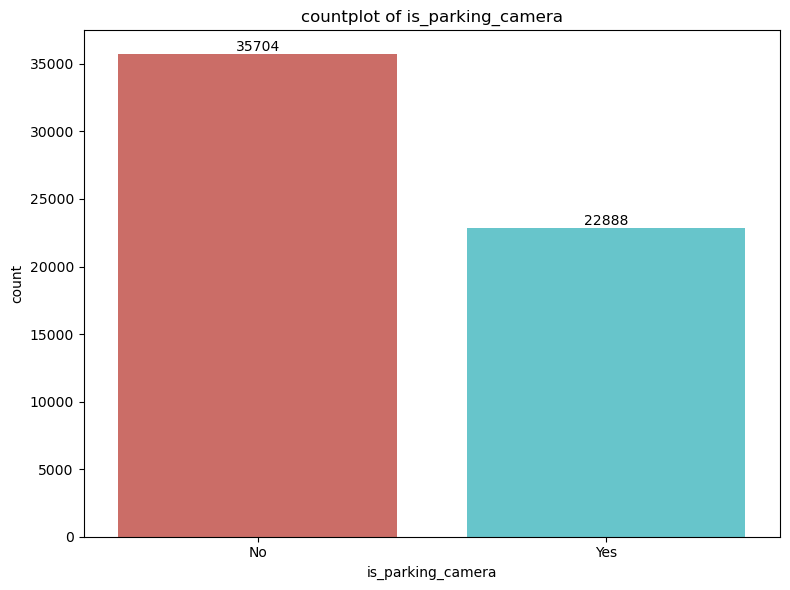

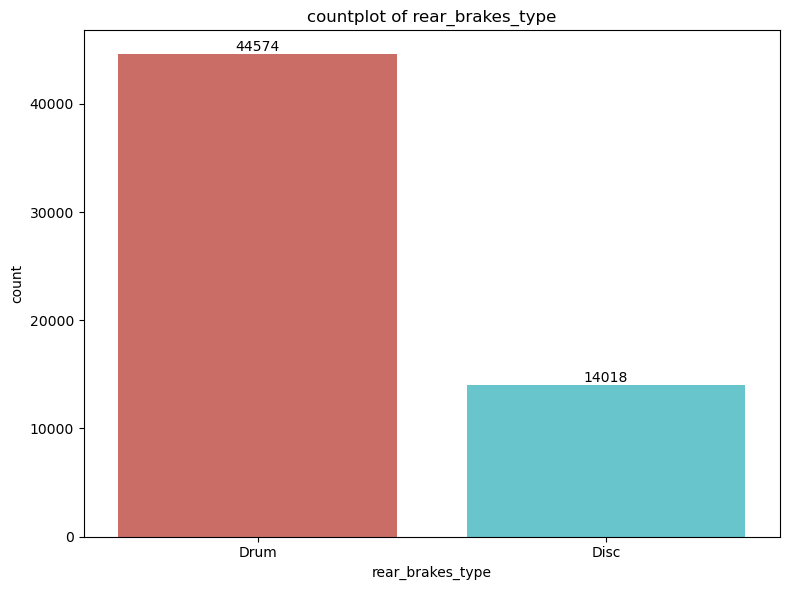

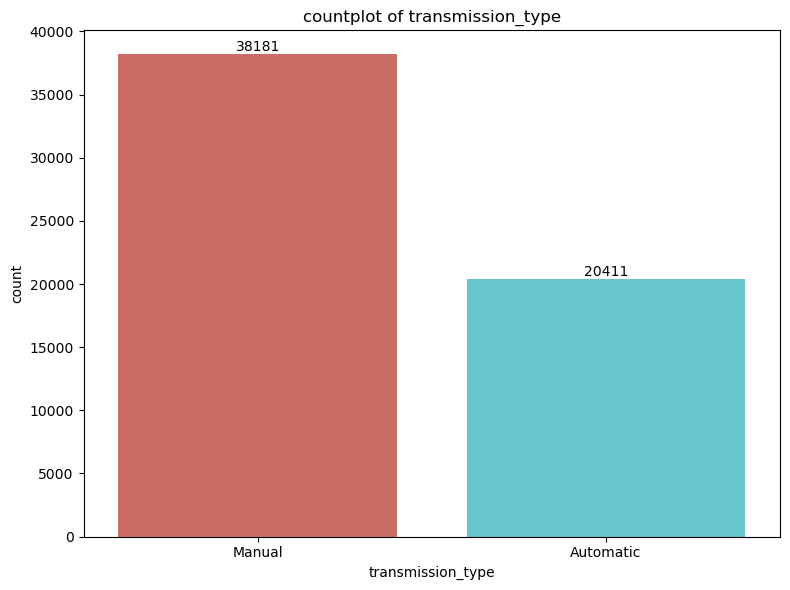

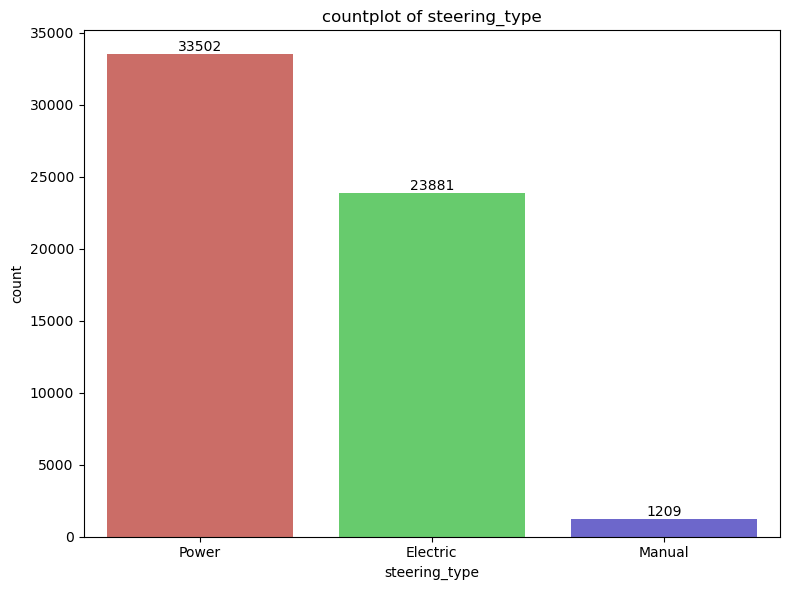

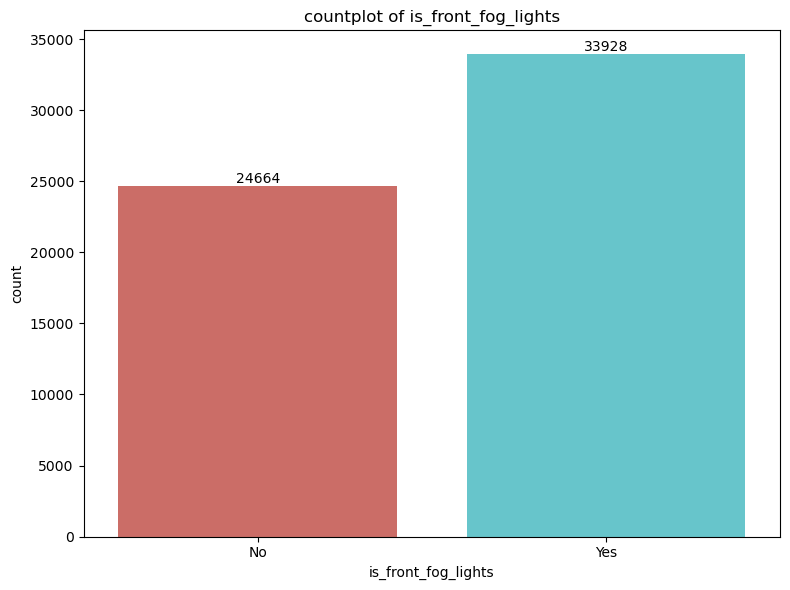

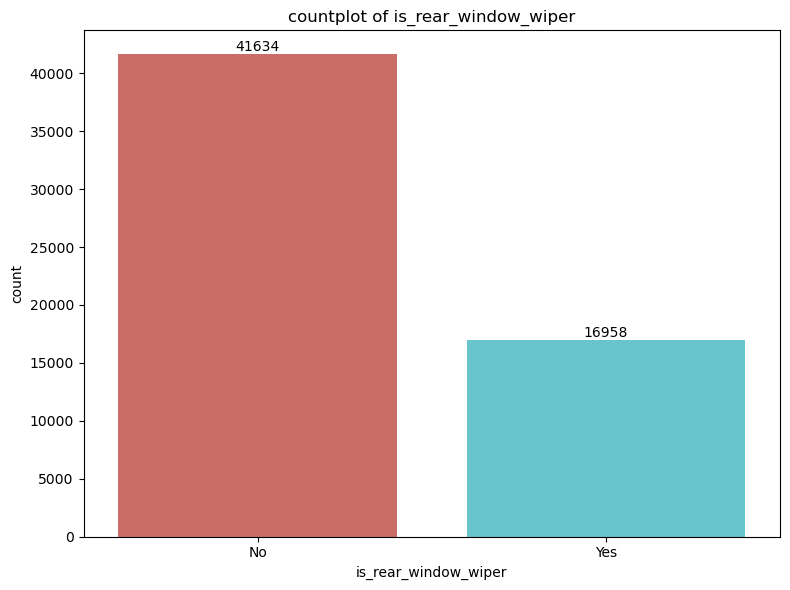

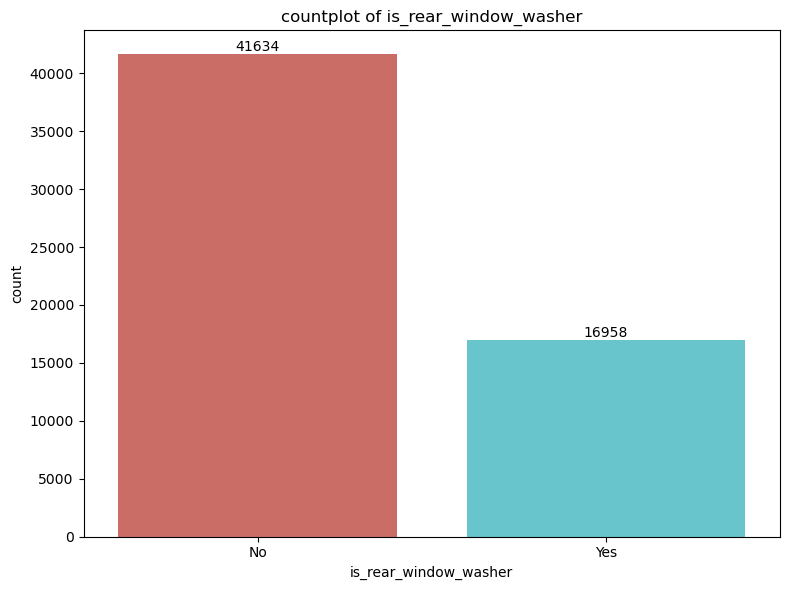

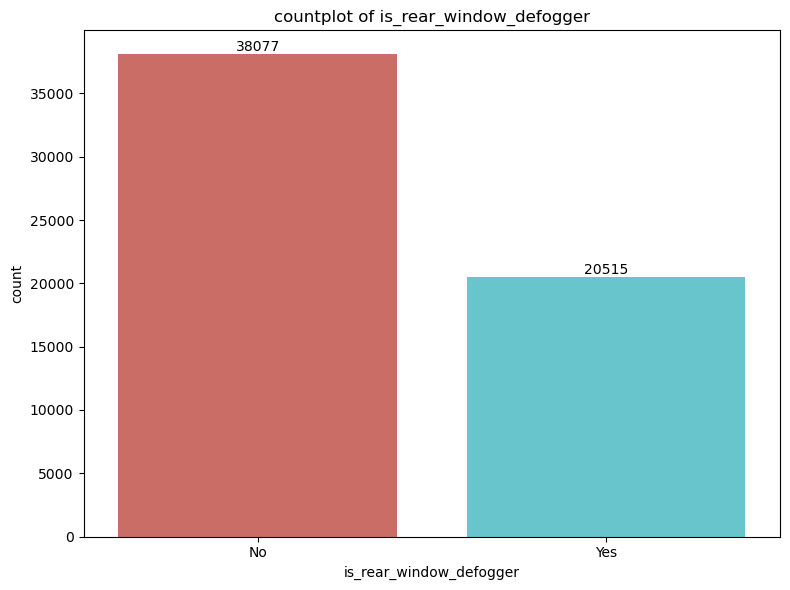

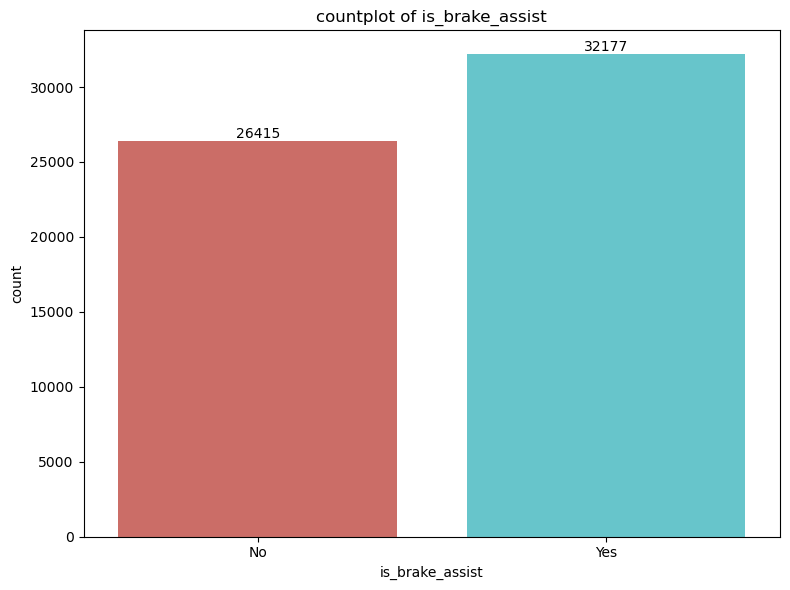

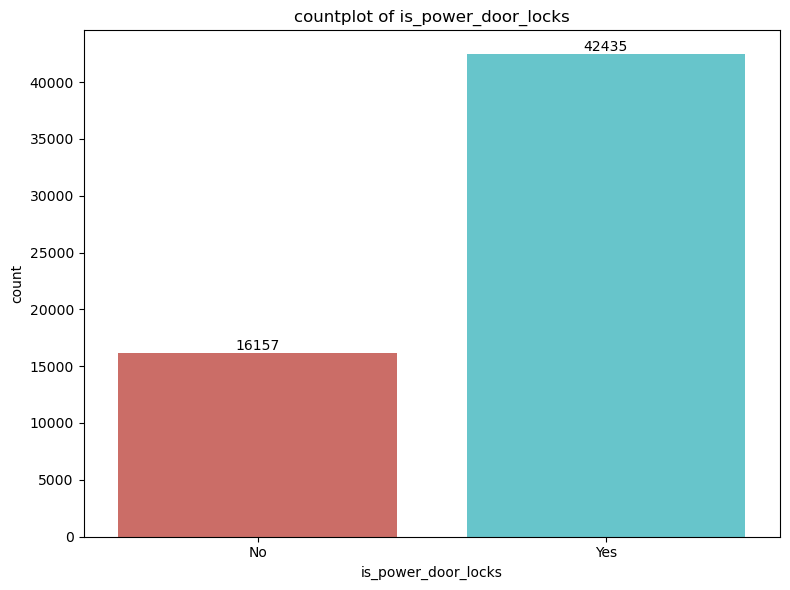

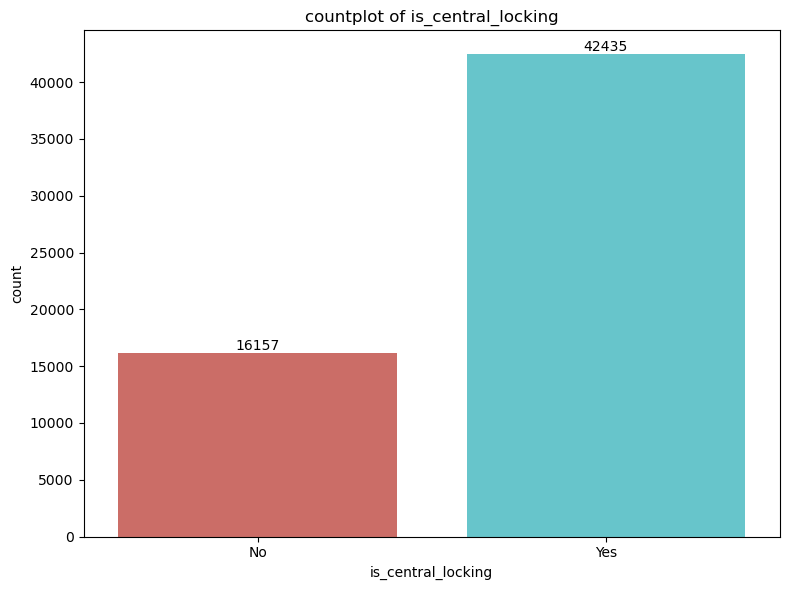

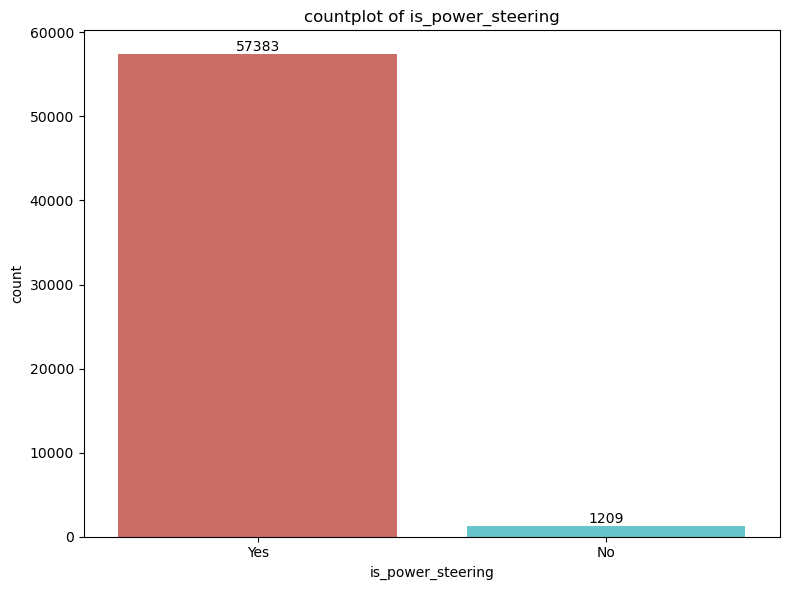

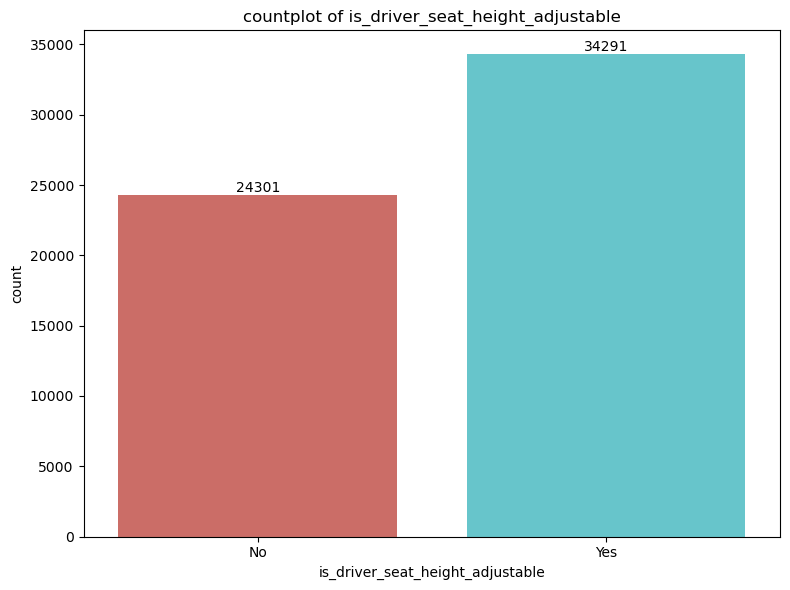

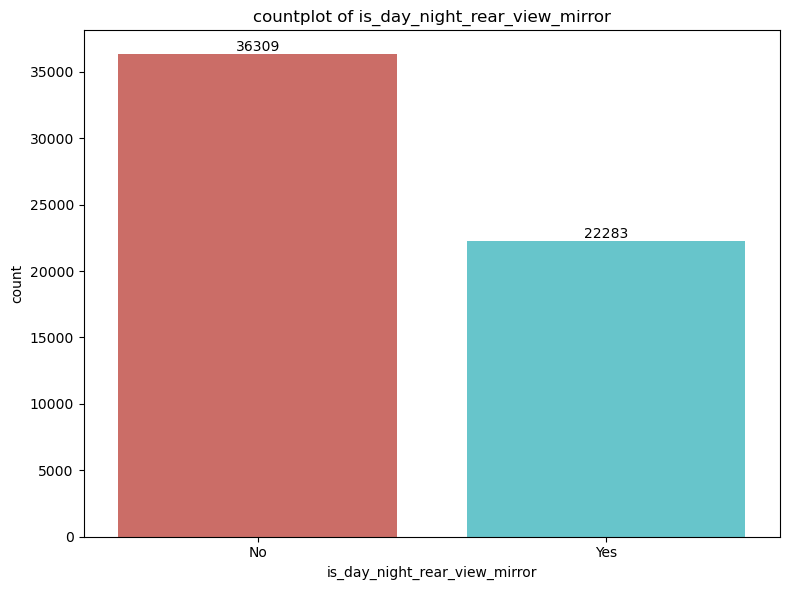

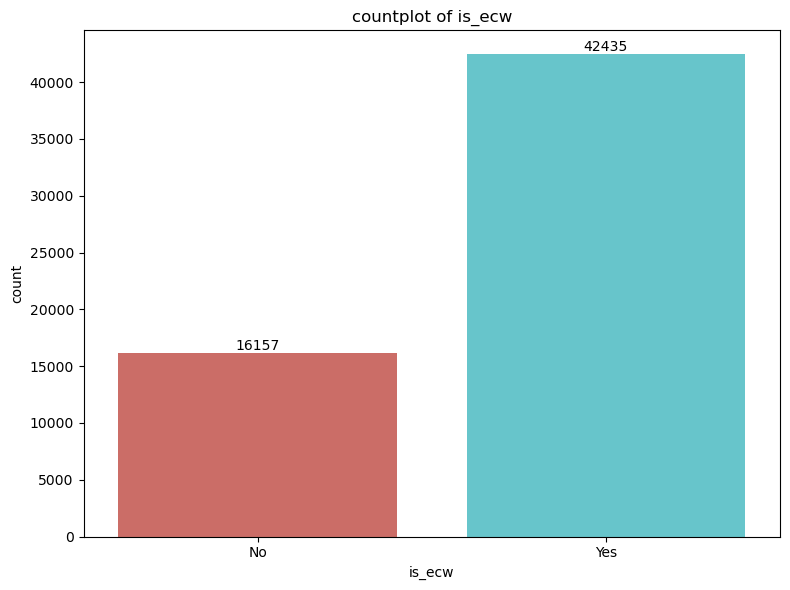

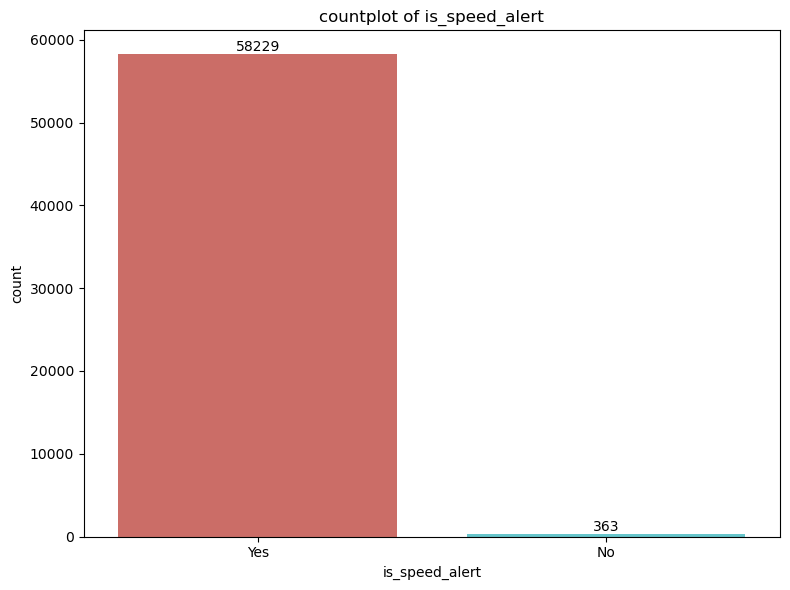

In [15]:
def plot_countplot(cat_col, col):
    plt.figure(figsize = (8,6))
    ax = sns.countplot(x = col, data = cat_col, palette = 'hls')
    
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'countplot of {col}')
    plt.tight_layout()
    plt.show()

for col in cat_col:
    plot_countplot(cat_col, col)

### 2.4.3 Multicollinearity Check
Heatmap for all numerical columns

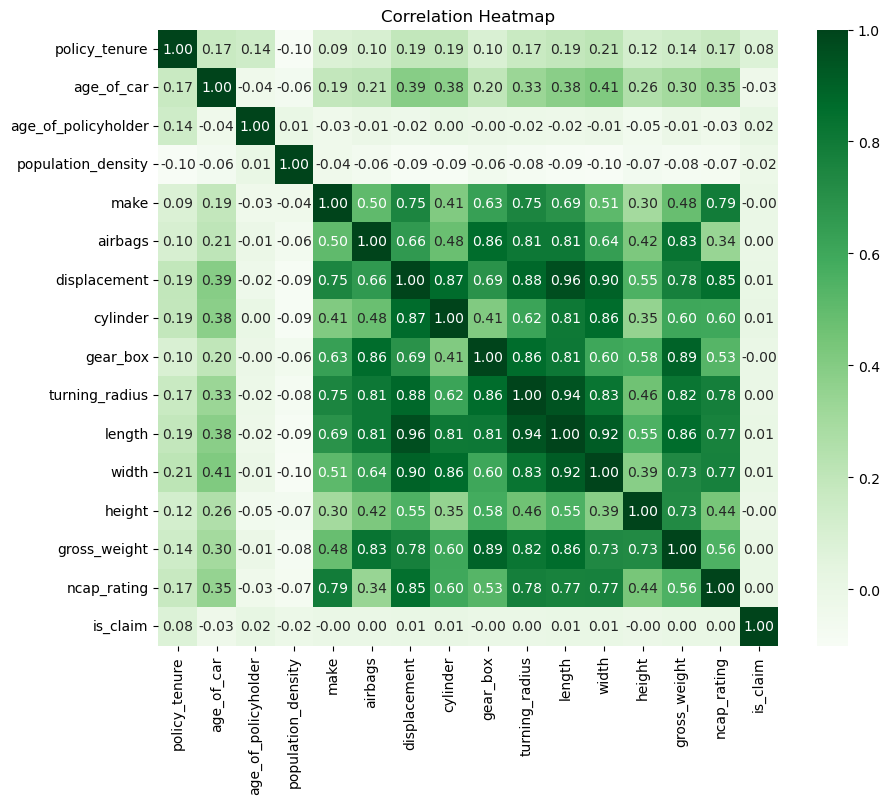

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(num_col.corr(), annot = True, cmap = "Greens", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

#

# 3. Data Preprocessing

### 3.1 Outlier treatment
#### (a) age_of_car

##### Visualization before Outler treatment

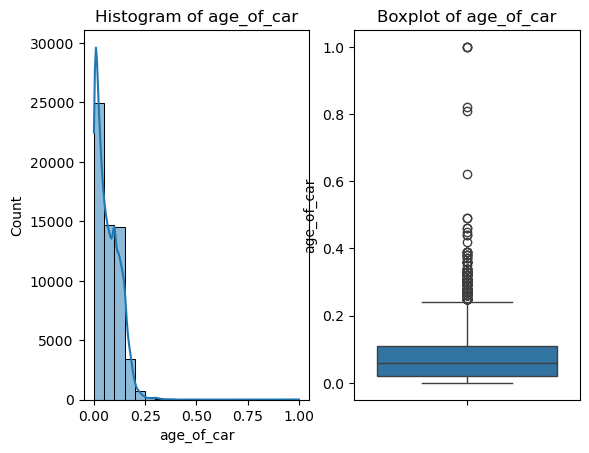

In [17]:
fig, axes = plt.subplots(1,2)
sns.histplot(df['age_of_car'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of age_of_car')

sns.boxplot(data = df['age_of_car'], ax= axes[1])
axes[1].set_title('Boxplot of age_of_car')
plt.show()

#### As the age_of_car is right skewed and it has long tail it would be more better if we use Percentile Winsorization  method to cap outliers:
- This method sets fixed, custom boundaries (1st and 99th percentiles) for the feature
- It clips all values lying outside these defined limits to the boundary values, effectively mitigating the impact of the most extreme outliers without deleting any valuable data records
- This ensures a more stable feature distribution for our model.

In [18]:
lower_cap = df['age_of_car'].quantile(0.01)
upper_cap = df['age_of_car'].quantile(0.99)

df['age_of_car'] = df['age_of_car'].clip(lower = lower_cap, upper = upper_cap)

##### Visualization after outlier treatment

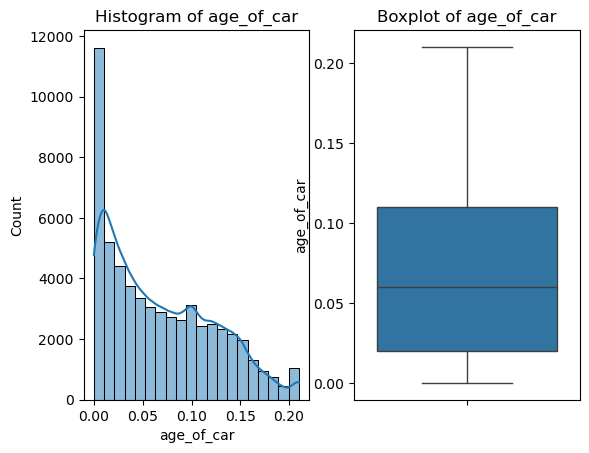

In [19]:
fig, axes = plt.subplots(1,2)
sns.histplot(df['age_of_car'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of age_of_car')

sns.boxplot(data = df['age_of_car'], ax= axes[1])
axes[1].set_title('Boxplot of age_of_car')
plt.show()

#

#### (b) age_of_policyholder

##### visualization before outlier treatment

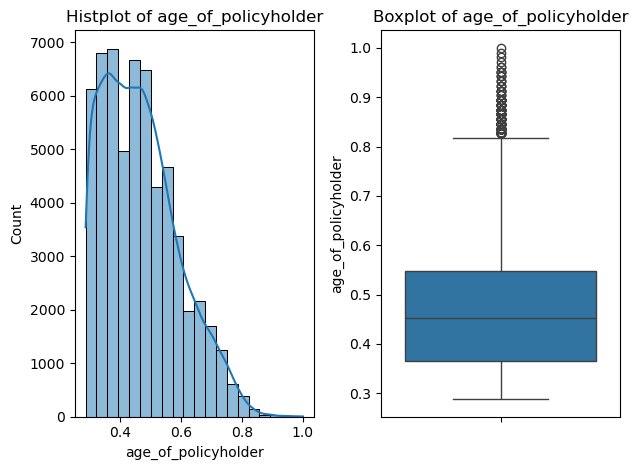

In [20]:
fig, axes = plt.subplots(1,2)
sns.histplot(df['age_of_policyholder'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histplot of age_of_policyholder')

sns.boxplot(data = df['age_of_policyholder'], ax = axes[1])
axes[1].set_title('Boxplot of age_of_policyholder')
plt.tight_layout()
plt.show()

##### Using Percentile Winsorization method to cap outliers 

In [21]:
lower_cap = df['age_of_policyholder'].quantile(0.01)
upper_cap = df['age_of_policyholder'].quantile(0.99)

df['age_of_policyholder'] = df['age_of_policyholder'].clip(lower = lower_cap, upper = upper_cap)

##### Visualization after outlier treatment

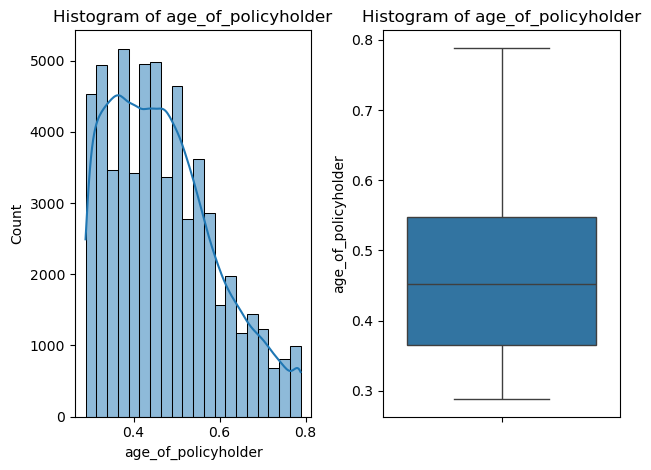

In [22]:
fig,axes = plt.subplots(1,2)
sns.histplot(df['age_of_policyholder'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of age_of_policyholder')

sns.boxplot(data = df['age_of_policyholder'], ax = axes[1])
axes[1].set_title('Histogram of age_of_policyholder')
plt.tight_layout()
plt.show()

#

#### (c) population_density

##### Visualization before outlier treatment

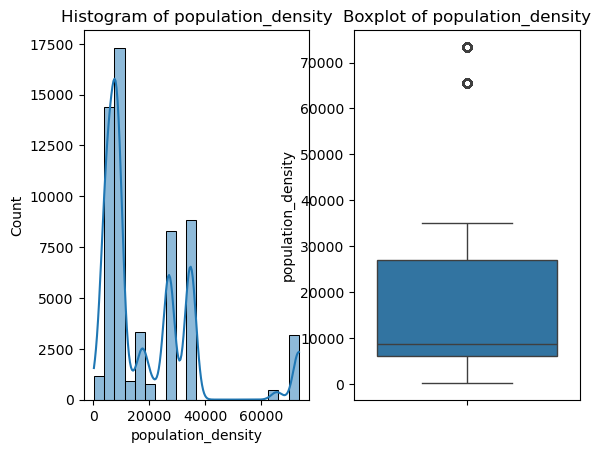

In [23]:
fig,axes = plt.subplots(1,2)
sns.histplot(df['population_density'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of population_density')

sns.boxplot(data = df['population_density'], ax = axes[1])
axes[1].set_title('Boxplot of population_density')
plt.show()

#### The population_density is highly skewed and contains extreme outliers. We will use a dual treatment:
- Log Transformation (log(X+1)) to reduce skewness and compress the large range.
- Percentile Winsorization for a final cleanup of any residual extreme points.
- This ensures the feature is stable and ready for the model.

In [24]:
df['population_density_log'] = np.log1p(df['population_density'])

In [25]:
print(df['population_density'].skew())

1.6741777983981572


In [26]:
print(df['population_density_log'].skew())

-0.4465920000944019


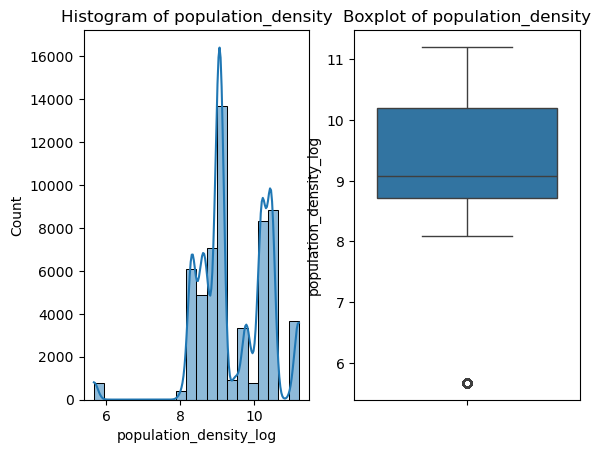

In [27]:
fig,axes = plt.subplots(1,2)
sns.histplot(df['population_density_log'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of population_density')

sns.boxplot(data = df['population_density_log'], ax = axes[1])
axes[1].set_title('Boxplot of population_density')
plt.show()

# _______________________________________________________________________________________________________________

##### Insight:
- Original Skewness: Was likely very high and positive (+1.67)
- Transformed Skewness: -0.45 is very close to zero
- Result: The feature is now only moderately left-skewed (a slight tail towards the left, or lower values)
- Conclusion: The Log Transformation effectively managed the extreme positive skewness and reduced the impact of the highest outliers, resulting in a much more stable and desirable distribution

# ________________________________________________________________________________________________________________

#### Applying Interquartile Range(IQR) on log transformed data 

In [28]:
Q1 = df['population_density_log'].quantile(0.25)
Q3 = df['population_density_log'].quantile(0.75)

IQR = Q3 - Q1

ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)

print(f'upper limit: {ul} | lower limit: {ll} | IQR: {IQR}')

upper limit: 12.432091310361313 | lower limit: 6.489821901829172 | IQR: 1.4855673521330353


In [29]:
ul_outliers = df[df['population_density_log']>ul].shape[0]
ll_outliers = df[df['population_density_log']<ll].shape[1]

total_outliers = ul_outliers + ll_outliers

per_outliers = total_outliers * 100/df['population_density_log'].shape[0]

print(f'ul_outliers: {ul_outliers} | ll_outliers: {ll_outliers} | total_outliers: {total_outliers} | per_outliers: {per_outliers}')

ul_outliers: 0 | ll_outliers: 44 | total_outliers: 44 | per_outliers: 0.07509557618787548


In [30]:
df['population_density'] = df['population_density_log'].clip(lower = ll, upper = ul)

In [31]:
df.drop(['population_density_log'], axis = 1, inplace = True)

##### Visualization after outlier treatment

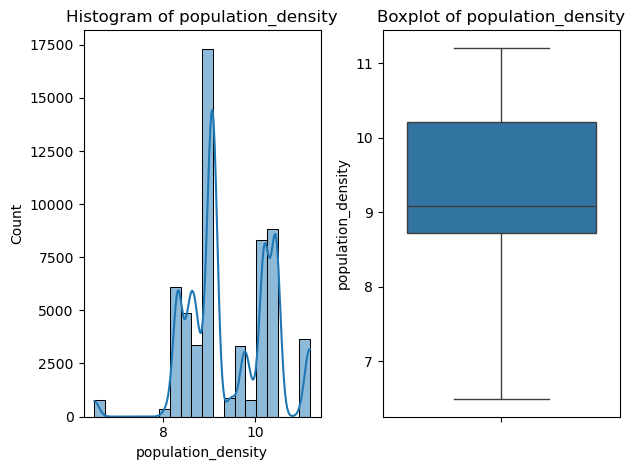

In [32]:
fig,axes = plt.subplots(1,2)
sns.histplot(df['population_density'], bins = 20, kde = True, ax = axes[0])
axes[0].set_title('Histogram of population_density')

sns.boxplot(data = df['population_density'], ax = axes[1])
axes[1].set_title('Boxplot of population_density')
plt.tight_layout()
plt.show()

# 

#

## 3.2 Feature Engineering

### Insight:
The max_torque and max_power columns contained mixed numerical and text data. To maximize predictive power, performed feature engineering to extract four distinct numerical features (Value and RPM for both Torque and Power) and dropped the original string columns. This ensures the model can use these precise performance metrics directly.

In [33]:
cat_col.head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


### (1) Cleaning max_torque and max_power column

In [34]:
# extract torque_value (numeric before 'Nm')
df['torque_value'] = df['max_torque'].str.extract(r'(\d+\.?\d*)Nm')

# extract torque_rpm (numeric before 'rpm')
df['torque_rpm'] = df['max_torque'].str.extract(r'@(\d+\.?\d*)rpm')

# extract power_value (numeric before 'bhp')
df['power_value'] = df['max_power'].str.extract(r'(\d+\.?\d*)bhp')

# extract power_rpm (numeric before 'rpm')
df['power_rpm'] = df['max_power'].str.extract(r'@(\d+\.?\d*)rpm')

# convert to numeric 
df[['torque_value', 'torque_rpm', 'power_value', 'power_rpm']] = df[['torque_value', 'torque_rpm', 'power_value', 'power_rpm']].apply(pd.to_numeric)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_value,torque_rpm,power_value,power_rpm
0,0.515874,0.05,0.644231,C1,8.515392,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,C2,10.203740,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,C3,8.313117,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,C4,9.981513,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400,88.50,6000
4,0.596403,0.11,0.634615,C5,10.455618,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250,67.06,5500


### (2) Cleaning the engine_type column

In [35]:
df['engine_type'].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

#### Extract three distinct components -> 
- engine_code: Extracting core codes (like F8D, K12N, K Series, i-DTEC) a clean categorical identifier for the engine type
- engine_litres: Separating the litre values (e.g., 1.2, 1.5) and calculating the missing values from the displacement (cc) column because cubic centimeters(cc) and Litres(L) are units of volume
-                                1 Litre = 1000 cubic centimeters(cc)
-                                 Litres = cc/1000
- engine_name: Separating technology/ description terms like (Dualjet, CRDi, Revotorq)

In [36]:
# 1. Extract litre values as Float
df['engine_liters'] = df['engine_type'].str.extract(r'(\d+\.?\d*)\s*L').astype(float)

# Fill missing using displacement column
df['engine_liters'] = df['engine_liters'].fillna(df['displacement'] / 1000)

In [37]:
# 2. Extract engine_code
df['engine_code'] = df['engine_type']

# Step 1: Remove litre prefixes (1.2L, 1.5 L etc.)
df['engine_code'] = df['engine_code'].str.replace(r'^\d+\.?\d*\s*L?\s*', '', regex=True)

# Step 2: Remove descriptive words (NOT codes)
remove_terms = [
    'Petrol Engine', 'Engine', 'Dualjet', 'Dual jet',
    'Turbocharged', 'Revotorq', 'Revotron', 'CRDi', 'i-DTEC']

for t in remove_terms:
    df['engine_code'] = df['engine_code'].str.replace(t, '', regex=False)

df['engine_code'] = df['engine_code'].str.strip()

# Step 3: If nothing left → "No code"
df['engine_code'] = df['engine_code'].replace('', 'No code')

In [38]:
# 3. Extract engine_name (Full exact phrase)
engine_name_terms = [
    'Turbocharged Revotorq',
    'Turbocharged Revotron',
    'K series Engine',
    'Petrol Engine',
    'Dual jet',
    'Dualjet',
    'CRDi',
    'SCe',
    'i-DTEC',
    'K Series Engine'
]

def extract_engine_name(x):
    for t in engine_name_terms:
        if t in x:
            return t
    return 'other'   # default when no match

df['engine_name'] = df['engine_type'].apply(extract_engine_name)

In [39]:
df.drop(['max_torque', 'max_power', 'engine_type'], axis =1, inplace = True)

# 

#### (3) Difference of age_of_policyholder and age_of_car quantifies the driver's driving experience relative to the car's age or modernity

- A young policyholder driving a very old car might represent a different risk profile than an older, experienced driver in a brand-new car.
- It helps the model understand if the policyholder is likely comfortable or experienced with the specific vehicle type (e.g., someone with 2 years of driving experience in a 10-year-old car vs. an 8-year veteran in a 2-year-old car

In [40]:
df['policyholder_car_age_diff'] = df['age_of_policyholder'] - df['age_of_car']

#

#### (4) calculation of policy duration per age from policy_tenure and age_of_policyholder 
- provides a view of how loyal the customer is relative to their lifetime or how long they've been an insurable adult.
- It can capture long-term loyalty factors or early-career risk profiles.

In [41]:
df['policy_duration_per_age'] = df['policy_tenure'] / df['age_of_policyholder']

#

#### (5) performance metric of car can be measured by dividing power_value with gross_weight
- measures how fast or powerful a car is relative to its mass
- This feature directly encodes a potential behavioral risk factor.

In [42]:
df['power_to_weight'] = df['power_value']/df['gross_weight']

#

#### (6) Density of the car can be calculated using length, width, height, gross_weight
- it heps the model indirectly understand the physical characteristics related to crash outcomes and claim types.

In [43]:
df['car_volume'] = df['length'] * df['width'] * df['height'] 

df['area_per_weight'] = df['car_volume']/df['gross_weight']

#

#### (7) Safety features count of the car
- Create a simple count of how many safety features the car has

In [44]:
safety_cols_to_convert = [
    'is_esc',
    'is_tpms',
    'is_parking_sensors',
    'is_parking_camera',
    'is_brake_assist',
    'is_front_fog_lights',
    'is_rear_window_wiper',
    'is_rear_window_washer', 
    'is_rear_window_defogger',
    'is_power_door_locks',
    'is_central_locking',
    'is_speed_alert',
    'is_day_night_rear_view_mirror']

# Convert 'Yes'/'No' columns to 1/0 integers
for col in safety_cols_to_convert:
    df[col] = df[col].map({'Yes': 1, 'No': 0}).astype(int)

df['total_safety_features_count'] = df[safety_cols_to_convert].sum(axis=1) + df['airbags'] + df['ncap_rating']

print("Successfully created 'total_safety_features' column.")
df['total_safety_features_count'].head()

Successfully created 'total_safety_features' column.


0     4
1     4
2     4
3    14
4     9
Name: total_safety_features_count, dtype: int64

#

#### (8) Density per car weight  this feature helps the model understand:
- how crowded the place is,
- how heavy the car is,
- and how these two together affect the chance of filing an insurance claim.

In [45]:
df['density_per_car_weight'] = df['population_density'] / df['gross_weight']

#

#### (9) engine size per weight:
- combiantion of engine displacement (engine size) relative to total mass
- A higher value indicates a more powerful or efficient engine for its weight class
- (higher speed impacts vs. minor scrapes) which could influence claim probability.

In [46]:
df['engine_size_per_weight'] = df['displacement'] / df['gross_weight']

#

#### (10) torque per volume:
- a proxy for vehicle efficiency/ performance
- this helps to calculate engine pulling power to the car's internal size / volume

In [47]:
df['torque_per_car_volume'] = df['torque_value'] / df['car_volume']

#

#### (11) policy tenure age interaction: 
- combines aspect's of policy holder's history with car's age

In [48]:
df['policy_tenure_age_interaction'] = df['policy_tenure'] * df['age_of_policyholder']

#

#### (12) car age tenure diifferenc:
- calculates the difference between age of car and how long the current policy holder has been insured
- It helps flag situations where someone recently insured a very old car, or a very new car, which might represent different risk exposures than the average case

In [49]:
df['car_age_tenure_diff'] = df['age_of_car'] - df['policy_tenure']

#

#### (13) safety rating per weight:
- This combines the formal safety rating (NCAP score) with the physical mass (weight) of the car
- It is a proxy for how a car performs in real-world collisions. A heavy car with a high NCAP rating likely handles crashes differently than a light car with a low rating, impacting the likelihood and severity of a claim

In [50]:
df['safety_rating_per_weight'] = df['ncap_rating'] * df['gross_weight']

#

#

### 3.3 Dropping Redundant Columns: Addressing Multicollineaity

In [51]:
# Redundant with steering_type column
df.drop(['is_power_steering'], axis = 1, inplace = True)

## 

## 3.4 Encoding

In [52]:
# updated cat cols for encoding
cat_cols = df.select_dtypes(include = ['object', 'category']).copy()

In [53]:
for i in cat_cols:
    print(i, cat_cols[i].unique())
    print('-'*50)

area_cluster ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
--------------------------------------------------
segment ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
--------------------------------------------------
model ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
--------------------------------------------------
fuel_type ['CNG' 'Petrol' 'Diesel']
--------------------------------------------------
is_adjustable_steering ['No' 'Yes']
--------------------------------------------------
rear_brakes_type ['Drum' 'Disc']
--------------------------------------------------
transmission_type ['Manual' 'Automatic']
--------------------------------------------------
steering_type ['Power' 'Electric' 'Manual']
--------------------------------------------------
is_driver_seat_height_adjustable ['No' 'Yes']
--------------------------------------------------
is_ecw ['No' 'Yes']
-------------------------------------

# _______________________________________________________________________________________________________________

### Observation:
area_cluster has 22 unique values

### Encoding Insight : 
#### Target Encoding for area_cluster
- The area_cluster feature has 22 unique values (moderate cardinality).
- Applying One-Hot Encoding would unnecessarily inflate the feature space by creating 21 new columns,leading to the curse of dimensionality and sparsity.
- Therefore, we will use Target Encoding This method replaces each cluster ID with its mean claim rate (likelihood of is_claim=1), converting the high-cardinality categorical feature into a single, highly predictive numerical score. This prevents the curse of dimensionality caused by One-Hot Encoding.

# __________________________________________________________________________________________________________________

### one Hot Encoding

In [54]:
cols_to_encode = [
    'segment', 'model', 'fuel_type', 'is_adjustable_steering',
    'rear_brakes_type', 'transmission_type', 'steering_type',
    'is_driver_seat_height_adjustable', 'is_ecw',
    'engine_code', 'engine_name']

df = pd.get_dummies(df, columns = cols_to_encode, drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print("Boolean columns converted:", list(bool_cols))
df.head()

Boolean columns converted: ['segment_B1', 'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility', 'model_M10', 'model_M11', 'model_M2', 'model_M3', 'model_M4', 'model_M5', 'model_M6', 'model_M7', 'model_M8', 'model_M9', 'fuel_type_Diesel', 'fuel_type_Petrol', 'is_adjustable_steering_Yes', 'rear_brakes_type_Drum', 'transmission_type_Manual', 'steering_type_Manual', 'steering_type_Power', 'is_driver_seat_height_adjustable_Yes', 'is_ecw_Yes', 'engine_code_G12B', 'engine_code_K Series', 'engine_code_K10C', 'engine_code_K12N', 'engine_code_No code', 'engine_code_SCe', 'engine_code_U2', 'engine_name_Dual jet', 'engine_name_Dualjet', 'engine_name_K Series Engine', 'engine_name_Petrol Engine', 'engine_name_SCe', 'engine_name_Turbocharged Revotorq', 'engine_name_Turbocharged Revotron', 'engine_name_i-DTEC', 'engine_name_other']


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,airbags,is_esc,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim,torque_value,torque_rpm,power_value,power_rpm,engine_liters,policyholder_car_age_diff,policy_duration_per_age,power_to_weight,car_volume,area_per_weight,total_safety_features_count,density_per_car_weight,engine_size_per_weight,torque_per_car_volume,policy_tenure_age_interaction,car_age_tenure_diff,safety_rating_per_weight,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,is_adjustable_steering_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_driver_seat_height_adjustable_Yes,is_ecw_Yes,engine_code_G12B,engine_code_K Series,engine_code_K10C,engine_code_K12N,engine_code_No code,engine_code_SCe,engine_code_U2,engine_name_Dual jet,engine_name_Dualjet,engine_name_K Series Engine,engine_name_Petrol Engine,engine_name_SCe,engine_name_Turbocharged Revotorq,engine_name_Turbocharged Revotron,engine_name_i-DTEC,engine_name_other
0,0.515874,0.05,0.644231,C1,8.515392,1,2,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,1,0,0,60.0,3500,40.36,6000,0.796,0.594231,0.800759,0.034059,7698283125,6.496441e+06,4,0.007186,0.671730,7.793946e-09,0.332342,-0.465874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.672619,0.02,0.375000,C2,10.203740,1,2,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,1,0,0,60.0,3500,40.36,6000,0.796,0.355000,1.793649,0.034059,7698283125,6.496441e+06,4,0.008611,0.671730,7.793946e-09,0.252232,-0.652619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.841110,0.02,0.384615,C3,8.313117,1,2,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,0,1,0,0,60.0,3500,40.36,6000,0.796,0.364615,2.186887,0.034059,7698283125,6.496441e+06,4,0.007015,0.671730,7.793946e-09,0.323504,-0.821110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.900277,0.11,0.432692,C4,9.981513,1,2,1,0,1,1,1197,4,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,1.200,0.322692,2.080639,0.066292,10500957375,7.865886e+06,14,0.007477,0.896629,1.076092e-08,0.389543,-0.790277,2670,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,C5,10.455618,2,2,0,0,0,1,999,3,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,1,2,0,91.0,4250,67.06,5500,0.999,0.524615,0.939786,0.058061,8777961010,7.599966e+06,9,0.009052,0.864935,1.036687e-08,0.378486,-0.486403,2310,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


#

# 4. Data Splitting into Train and Test

In [55]:
x = df.drop('is_claim', axis = 1)
y = df['is_claim']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, stratify = y, random_state = 42)
print(x.shape, x_train.shape, x_test.shape)

(58592, 86) (41014, 86) (17578, 86)


#

# 5.Target Encoding for area_cluster column

### Target Encoding:
Target Encoding is a technique used to convert categorical variables into numerical values by using information from the target variable.
For each category, it replaces the category with the average value of the target for that category.

#### How it is calculated:
For a categorical value 𝑐
 Target Encoded Value = Sum of target values for category 𝑐 / Number of records in category 𝑐
  
  
  ##### ex:- 
  if a category appears 100 times and 10 of them resulted in a claim, the target-encoded value would be:
  - 10/100 = 0.10
-  This means that category has a 10% claim rate.

#### used:
- Captures the relationship between categories and the target
- Works well with high-cardinality categorical features
- Often improves model performance compared to One-Hot Encoding

In [57]:
# pip install category_encoders

In [58]:
import category_encoders as ce

# Initialize the Target Encoder
encoder = ce.TargetEncoder(cols=['area_cluster'], smoothing=0.1) # use smoothing to prevent overfitting on small categories

# Fit the encoder only on the training data (using the training target)
encoder.fit(x_train, y_train)

# Transform both training and test sets using the same fitted encoder
x_train_encoded = encoder.transform(x_train)
x_test_encoded = encoder.transform(x_test)

#

# 6. Scaling

In [59]:
numeric_cols = x_train_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Fit on train, transform train
x_train[numeric_cols] = scaler.fit_transform(x_train_encoded[numeric_cols])

# Only transform test
x_test[numeric_cols] = scaler.transform(x_test_encoded[numeric_cols])

print("Scaling completed successfully!")

Scaling completed successfully!


#

# 7. Applying SMOTE Tomek Technique

In [60]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

#

# 8. Model Training

### (1) Random Forest Model with SMOTE

In [61]:
rf_model = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=None,        # let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',   
    random_state=42,
    n_jobs=-1              
)

# Train the model
rf_model.fit(x_res, y_res)

# Predictions
y_pred = rf_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87216975765161

Confusion Matrix:
[[15211  1243]
 [ 1004   120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     16454
           1       0.09      0.11      0.10      1124

    accuracy                           0.87     17578
   macro avg       0.51      0.52      0.51     17578
weighted avg       0.88      0.87      0.88     17578



###  --------- Accuracy Score ----------

In [63]:
train_pred = rf_model.predict(x_res)
print("Training Accuracy:", accuracy_score(y_res, train_pred))

# Testing accuracy
test_pred = rf_model.predict(x_test)
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.87216975765161


###  -------- Confusion Matrix ----------

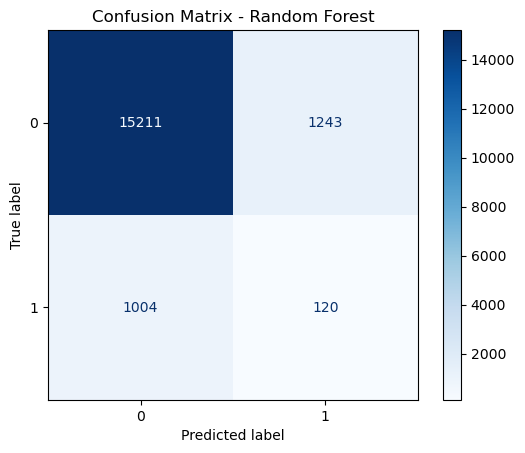

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred,cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

###  -------- ROC-AUC Curve ---------

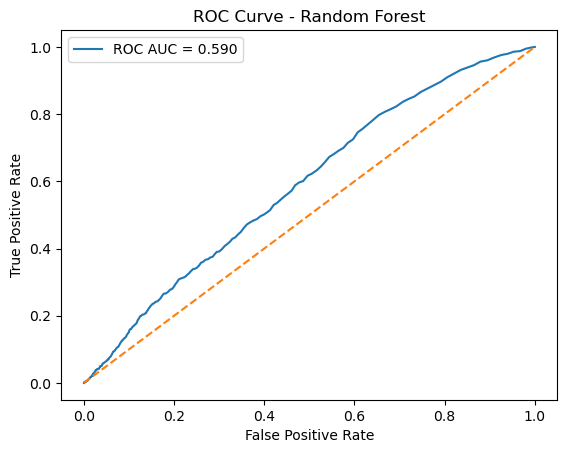

In [67]:
# Predict probabilities
from sklearn.metrics import roc_curve, auc
y_test_proba = rf_model.predict_proba(x_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### Observation:
- The model achieved very high training accuracy (100%) but much lower minority-class performance.
- This indicates severe overfitting — the model memorized the training data.
- Claim detection (Class 1) is weak with low recall (11%) and F1-score (0.10).
- ROC-AUC (0.59) shows poor discrimination ability.

### Insight:
SMOTE-Tomek caused the Random Forest to overfit without improving real claim detection

#

#

## (2) Hyper parameter tuning for Random Forest model

In [68]:
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score, average='binary')

param_dist = {
    'n_estimators': [100, 150], 
    'max_depth': [8, 12, 16], 
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
}

rf = RandomForestClassifier(random_state=42, n_jobs = -1)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=6,               
    cv=3,                    
    random_state=42,
    n_jobs=-1,               
    scoring=f1_scorer        
)

# Fit on the resampled data
rf_random.fit(x_res, y_res) # x_res and y_res are the SMOTETomek outputs

print("Best F1 Score (CV):", rf_random.best_score_)
print("Best Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_
test_preds = best_rf.predict(x_test) 

print("\n===== TEST METRICS (Best Tuned RF) =====")
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_preds))

Best F1 Score (CV): 0.8594727694114859
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16}

===== TEST METRICS (Best Tuned RF) =====
Test Accuracy: 0.7656161110479008

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86     16454
           1       0.10      0.31      0.15      1124

    accuracy                           0.77     17578
   macro avg       0.52      0.56      0.51     17578
weighted avg       0.89      0.77      0.82     17578


Confusion Matrix:
 [[13105  3349]
 [  771   353]]


In [69]:
train_pred = best_rf.predict(x_res)
print("Training Accuracy:", accuracy_score(y_res, train_pred))

Training Accuracy: 0.907305095150399


###  -------- Confusion Matrix --------

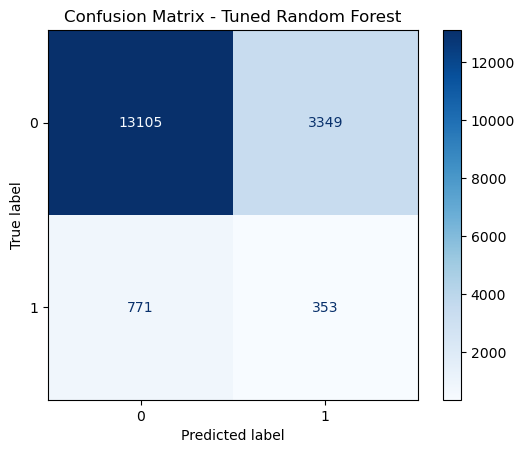

In [70]:
ConfusionMatrixDisplay.from_estimator(best_rf,x_test,y_test,cmap='Blues')

plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

### -------- ROC-AUC Curve --------

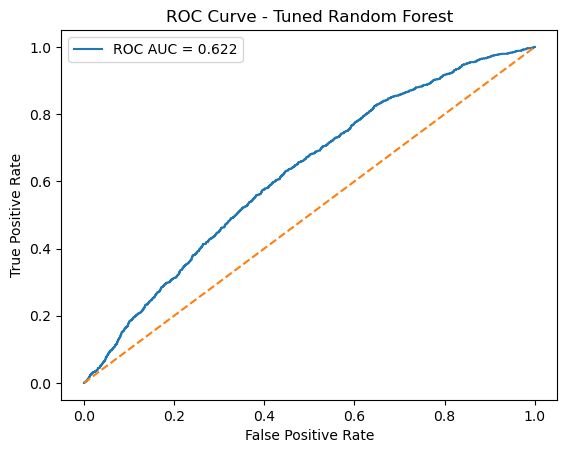

In [71]:
# Predicted probabilities for positive class
y_prob = best_rf.predict_proba(x_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.show()

### Observation:
- Training accuracy reduced and test accuracy dropped to 76%, indicating better regularization
- Recall for claims improved significantly to 31%, and F1-score increased to 0.15
- ROC-AUC improved to 0.62, showing better ranking ability

### Insight:
Hyperparameter tuning reduced overfitting and improved claim detection, making this the best Random Forest variant

#

# 

## (3) XG Boost Model without applying SMOTE Tomek links

In [72]:
from collections import Counter

counter = Counter(y_train)
majority = counter[0]
minority = counter[1]

scale_pos_weight = majority / minority
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 14.630335365853659


In [73]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,   # ★ handles imbalance
    eval_metric='logloss',
    random_state=42
)

xgb.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### -------- Accuracy Score --------

In [74]:
y_pred = xgb.predict(x_test_encoded)

train_pred = xgb.predict(x_train_encoded)
print("Training Accuracy:", accuracy_score(y_train, train_pred))

print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.7391134734480909
Testing Accuracy: 0.6929115940380021

Confusion Matrix:
[[11670  4784]
 [  614   510]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     16454
           1       0.10      0.45      0.16      1124

    accuracy                           0.69     17578
   macro avg       0.52      0.58      0.49     17578
weighted avg       0.90      0.69      0.77     17578



### -------- Confusion Matrix -------

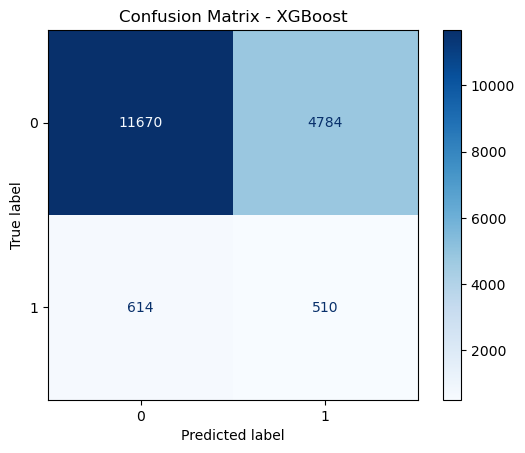

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### ------- ROC-AUC Curve -------

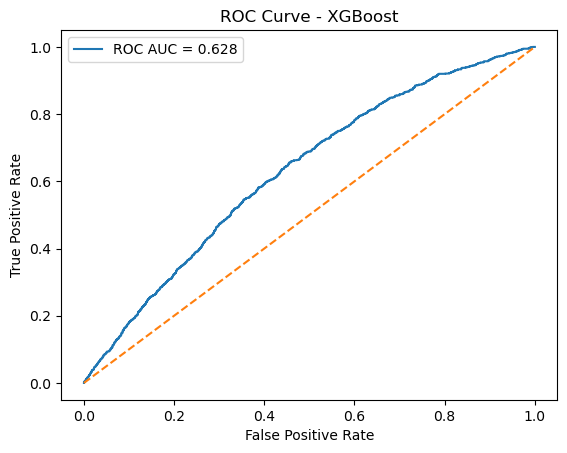

In [76]:
y_test_proba = xgb.predict_proba(x_test_encoded)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

### Observation:
- Model achieved balanced train (73%) and test (69%) accuracy, indicating good generalization
- Claim recall increased to 45%, the highest among all base models
- F1-score (0.16) and ROC-AUC (0.63) are among the best observed.

### Insight:
XGBoost handles imbalance better using class weights and captures claim patterns more effectively than Random Forest.

#

# 

## (4) Hyper parameter tuning for XG Boost without SMOTE 

In [77]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### -------- Accuracy Score -------

In [78]:
train_pred = model.predict(x_train_encoded)
y_pred = model.predict(x_test_encoded)

print("--- Evaluation Report (Base XGBoost Model) ---")

# Accuracy Scores
print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.4f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))

# Classification Report for Test Set 
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

--- Evaluation Report (Base XGBoost Model) ---
Training Accuracy: 0.8109
Testing Accuracy: 0.7423

Confusion Matrix (Test Set):
[[12650  3804]
 [  726   398]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     16454
           1       0.09      0.35      0.15      1124

    accuracy                           0.74     17578
   macro avg       0.52      0.56      0.50     17578
weighted avg       0.89      0.74      0.80     17578



### ------- Confusion Matrix -------

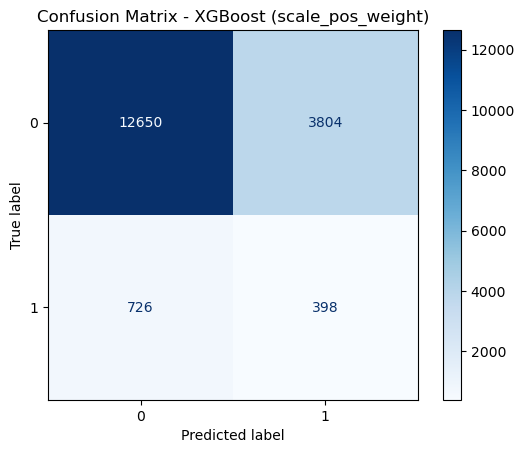

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
plt.title('Confusion Matrix - XGBoost (scale_pos_weight)')
plt.show()

### ------- ROC-AUC Curve --------

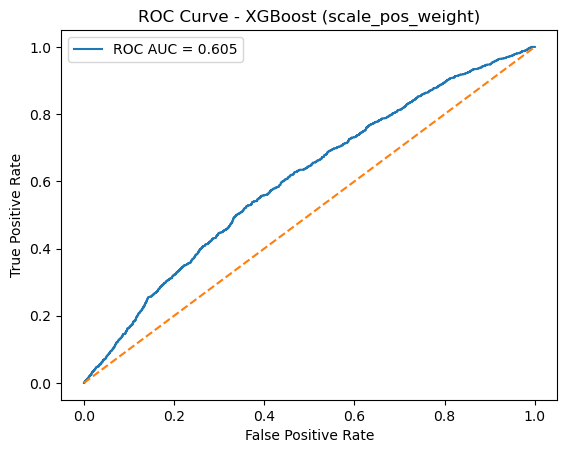

In [80]:
y_test_proba = model.predict_proba(x_test_encoded)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (scale_pos_weight)')
plt.legend()
plt.show()

### Observation:
- Training accuracy increased to 81%, with test accuracy 74%.
- Claim recall settled at 35%, and F1-score remained around 0.15.
- ROC-AUC (0.60) showed no major improvement over the base XGBoost.

### Insight:
Hyperparameter tuning did not significantly improve minority-class performance beyond the base XGBoost model.

#

#

## (5) XG Boost with SMOTE Tomek

In [84]:
xgb_smote = XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train the model on the RESAMPLED data
xgb_smote.fit(x_res, y_res)

# Predictions on the original test data
test_pred = xgb_smote.predict(x_test)
train_pred = xgb_smote.predict(x_res)

# Evaluation
print("--- Evaluation Report (XGBoost + SMOTETomek) ---")
print("Training Accuracy:", accuracy_score(y_res, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred))

--- Evaluation Report (XGBoost + SMOTETomek) ---
Training Accuracy: 0.9190354178343609
Testing Accuracy: 0.9120491523495278

Confusion Matrix (Test Set):
[[15941   513]
 [ 1033    91]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16454
           1       0.15      0.08      0.11      1124

    accuracy                           0.91     17578
   macro avg       0.54      0.52      0.53     17578
weighted avg       0.89      0.91      0.90     17578



### -------- Cofusion Matrix --------

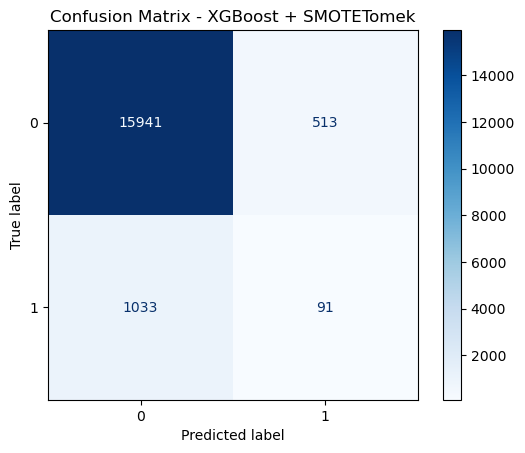

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred,cmap='Blues')
plt.title('Confusion Matrix - XGBoost + SMOTETomek')
plt.show()

### -------- ROC-AUC Curve --------

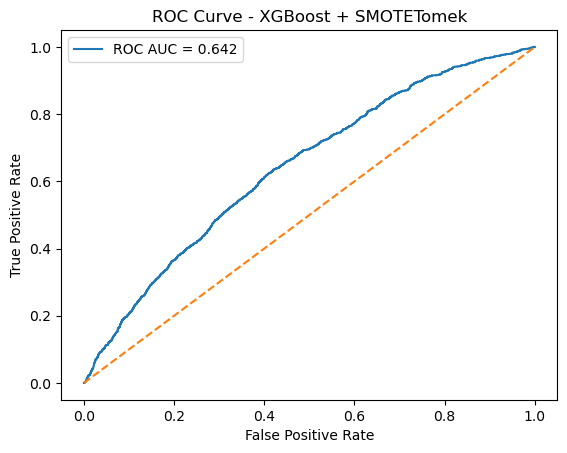

In [86]:
from sklearn.metrics import roc_curve, auc
# Probabilities for positive class
y_test_proba = xgb_smote.predict_proba(x_test)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + SMOTETomek')
plt.legend()
plt.show()

### Observation:
- Test accuracy became very high (91%), but claim recall dropped sharply to 8%.
- The model heavily favored the majority class.
- Despite good ROC-AUC (0.64), actual claim detection was poor.

### Insight: 
SMOTE-Tomek caused the model to bias toward non-claims, making it unsuitable for claim prediction.

#

#

# 9. Final Model Selection

### Model Performance Comparison (Minority Class – Class 1):
Need to compare the performance using the Test F1-score for Class 1, as overall accuracy is misleading due to class imbalance.


| Model                          | Test F1-Score (Class 1) | Test Recall (Class 1) | Test Precision (Class 1) | Overfitting? |
|--------------------------------|--------------------------|------------------------|--------------------------|--------------|
| RF + SMOTE Tomek               | 0.10                     | 0.11                   | 0.09                     | Yes (Train Acc = 1.0) |
| RF + Hyperparameter Tuning     | 0.15                     | 0.31                   | 0.10                     | Yes |
| XGBoost without SMOTE          | **0.16**                 | **0.45**               | 0.10                     | Yes |
| XGBoost with Hyperparameter Tuning | 0.15                 | 0.35                   | 0.09                     | Yes |
| XGBoost with SMOTE Tomek       | 0.11                     | 0.08                   | **0.15**                 | Yes |


####  Best Model Selection
- The best model among all your experiments is the Random Forest Model after Hyperparameter Tuning.
- It achieved the highest F1-score for the minority class (0.15), which is the most balanced and reliable metric for this problem.
- It also managed to identify 31% of all actual claims (Recall 0.31), which is a reasonable trade-off given the low precision.

#

# 10. Feature Importance

Top 20 Feature Importances for Best Tuned RF Model:
                          Feature  Importance
1                      age_of_car    0.167257
3                    area_cluster    0.104209
4              population_density    0.092201
44            car_age_tenure_diff    0.090330
43  policy_tenure_age_interaction    0.089326
0                   policy_tenure    0.089273
2             age_of_policyholder    0.079966
34      policyholder_car_age_diff    0.079423
35        policy_duration_per_age    0.079250
40         density_per_car_weight    0.069899
41         engine_size_per_weight    0.003021
11                   displacement    0.002959
37                     car_volume    0.002918
42          torque_per_car_volume    0.002863
38                area_per_weight    0.002485
17                         height    0.002435
33                  engine_liters    0.002365
29                   torque_value    0.002203
36                power_to_weight    0.002161
45       safety_rating_per_w

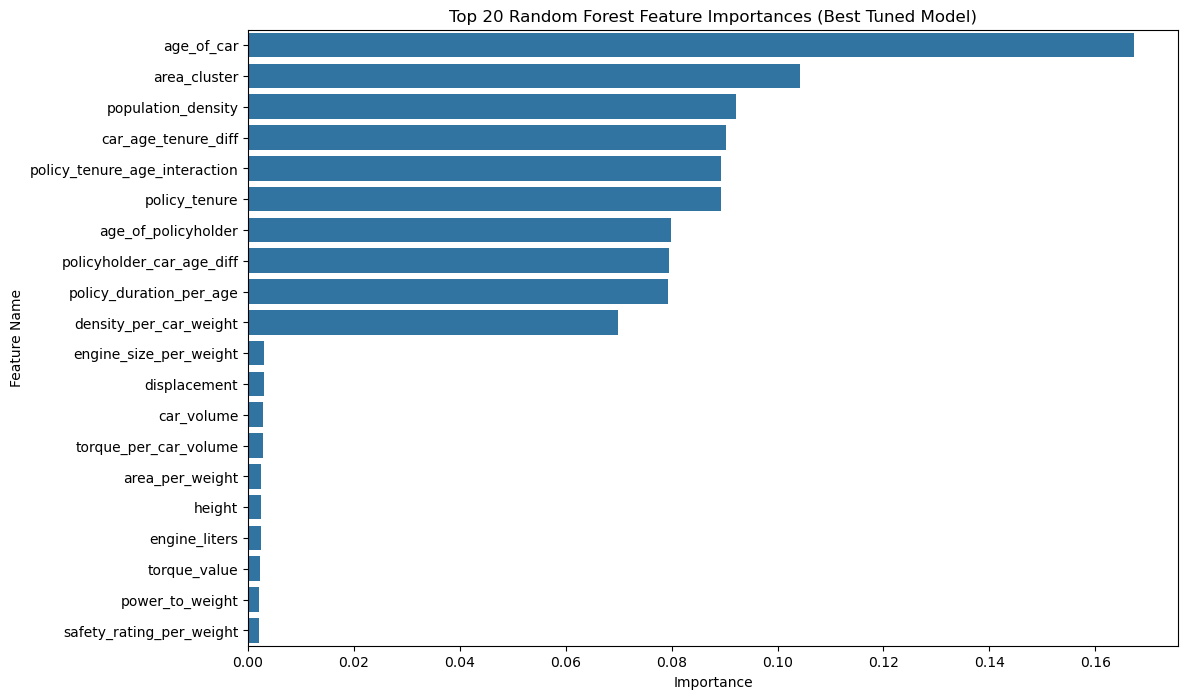

In [87]:
feature_names = x_test.columns

# Get the importance scores
importance_scores = best_rf.feature_importances_

# Created a DataFrame for better visualization and sorting
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importance_scores})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
print("Top 20 Feature Importances for Best Tuned RF Model:")
print(feature_importance_df.head(20))

# Optional: Plot the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Random Forest Feature Importances (Best Tuned Model)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

### Key Observations:
#### 1. Dominance of Age and Demographics: 
The model relies heavily on age-related features (age_of_car, age_of_policyholder, policy_tenure) and location demographics (area_cluster, population_density). The single most important feature is the age_of_car by a significant margin (16.7%).

#### 2. Success of Engineered Features (Age/Tenure): 
engineered features proved highly effective. Interaction terms that combine age and policy duration (car_age_tenure_diff, policy_tenure_age_interaction, policyholder_car_age_diff, policy_duration_per_age) all ranked within the top 10 features. This confirms that these interactions provide strong signals that the raw features alone could not capture.

#### 3. Failure of Physical/Performance Features: 
Some engineered features that combined physical car specifications (power, weight, volume ratios) contributed almost nothing to the model's performance. Features such as engine_size_per_weight, torque_per_car_volume, and power_to_weight have importance scores near zero.

#### 4. Clear Feature Pruning Opportunity: 
There is a sharp drop-off in importance after the top 10 features. The bottom 10 features provide negligible value to the model and can be removed for efficiency

### Insight:
The best model is primarily making decisions based on who the policyholder is and where they live/drive, rather than the specific mechanics or performance metrics of the vehicle they drive. To improve this model further, need more information about the driver's demographic or behavioral data points, as the current physical car specifications have been exhausted.

#

# 11. Save the Model

In [88]:
import joblib
import os

# Assuming 'best_rf' holds your final trained and tuned Random Forest model object
filename = 'best_random_forest_model.joblib'

# Save the model to disk
joblib.dump(best_rf, filename)

print(f"Model successfully saved as {filename}")
print(f"File size: {os.path.getsize(filename) / (1024*1024):.2f} MB")

Model successfully saved as best_random_forest_model.joblib
File size: 38.65 MB


#

# 11. Final Recommendation:
- The goal of this project was to predict insurance claims, which are very rare in the dataset (only about 6%).
- Because of this imbalance, accuracy alone was not enough, so I focused more on F1-score and Recall for claim cases.
- Tried different models like Random Forest and XGBoost, along with feature engineering and imbalance-handling techniques such as SMOTE-Tomek and class weights.
- Even after tuning the models, the performance did not improve much, and the best F1-score stayed around 0.15.
- The Random Forest model gave the best overall result, but it still made many false claim predictions.
- This shows that the current features are not strong enough to clearly identify claim cases.
- To build a better and more reliable model, we would need additional information such as driver history, location-based risk, or behavioral data.

#